In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import namedtuple
Flight = namedtuple("Flight", ["flight", "data"], verbose=False, rename=False) 

#https://www.cheapair.com/when-to-buy-flights/to-philadelphia-phl
datasets=[]

today=datetime.today().replace(minute=0, hour=0, second=0, microsecond=0)

def parseAndPlot(data,min_prc,max_prc):
    dt=data.split("L")
    X,y=[],[]
    for i in dt:
        b=i.strip().split(" ")
        X.append(float(b[0]))
        y.append(-float(b[1]))
    min_dtd=1
    max_dtd=320    
    y_min=min(y)
    y_max=max(y)
    factorY=(max_prc-min_prc)/(y_max-y_min)
    X_min=min(X)
    X_max=max(X)
    factorX=(max_dtd-min_dtd)/(X_max-X_min)
    XX=[321-(min_dtd+(i-X_min)*factorX) for i in X]
    yy=[min_prc+(i-y_min)*factorY for i in y]
    ax = plt.gca()
    #ax.invert_xaxis()
    plt.xticks(rotation=70)
    XX=[today - timedelta(days=i) for i in XX]
    plt.plot(XX,yy)
    plt.ylabel("Price$")
    plt.show()
    print('X:',round(X_min,2),' - ',round(X_max,2),'Y:',round(y_min,2),' - ',round(y_max,2))
    print('Y:',yy[:3],'...',yy[-3:]) 
    
    return pd.Series(yy,XX)
 
#1) Parse and plot USA flights data    

In [47]:
to_philadelphia="1.3828125 103.88 L 4.1484375 105.84 L 6.9140625 105.84 L 9.6796875 105.84 L 12.4453125 105.84 L 15.2109375 107.80000000000001 L 17.9765625 107.80000000000001 L 20.7421875 107.80000000000001 L 23.5078125 107.80000000000001 L 26.2734375 107.80000000000001 L 29.0390625 107.80000000000001 L 31.8046875 107.80000000000001 L 34.5703125 107.80000000000001 L 37.3359375 107.80000000000001 L 40.1015625 107.80000000000001 L 42.8671875 107.80000000000001 L 45.6328125 107.80000000000001 L 48.3984375 107.80000000000001 L 51.1640625 107.80000000000001 L 53.9296875 109.75999999999999 L 56.6953125 109.75999999999999 L 59.4609375 109.75999999999999 L 62.2265625 109.75999999999999 L 64.9921875 109.75999999999999 L 67.7578125 109.75999999999999 L 70.5234375 109.75999999999999 L 73.2890625 109.75999999999999 L 76.0546875 109.75999999999999 L 78.8203125 109.75999999999999 L 81.5859375 109.75999999999999 L 84.3515625 109.75999999999999 L 87.1171875 109.75999999999999 L 89.8828125 109.75999999999999 L 92.6484375 109.75999999999999 L 95.4140625 109.75999999999999 L 98.1796875 109.75999999999999 L 100.9453125 109.75999999999999 L 103.7109375 109.75999999999999 L 106.4765625 109.75999999999999 L 109.2421875 111.72 L 112.0078125 111.72 L 114.7734375 111.72 L 117.5390625 111.72 L 120.3046875 111.72 L 123.0703125 113.68 L 125.8359375 113.68 L 128.6015625 113.68 L 131.3671875 113.68 L 134.1328125 115.64000000000001 L 136.8984375 115.64000000000001 L 139.6640625 115.64000000000001 L 142.4296875 115.64000000000001 L 145.1953125 115.64000000000001 L 147.9609375 115.64000000000001 L 150.7265625 115.64000000000001 L 153.4921875 115.64000000000001 L 156.2578125 115.64000000000001 L 159.0234375 115.64000000000001 L 161.7890625 115.64000000000001 L 164.5546875 115.64000000000001 L 167.3203125 115.64000000000001 L 170.0859375 115.64000000000001 L 172.8515625 117.6 L 175.6171875 117.6 L 178.3828125 117.6 L 181.1484375 117.6 L 183.9140625 117.6 L 186.6796875 117.6 L 189.4453125 117.6 L 192.2109375 119.56 L 194.9765625 119.56 L 197.7421875 119.56 L 200.5078125 119.56 L 203.2734375 121.52000000000001 L 206.0390625 121.52000000000001 L 208.8046875 121.52000000000001 L 211.5703125 121.52000000000001 L 214.3359375 123.47999999999999 L 217.1015625 123.47999999999999 L 219.8671875 123.47999999999999 L 222.6328125 123.47999999999999 L 225.3984375 125.44 L 228.1640625 125.44 L 230.9296875 125.44 L 233.6953125 127.4 L 236.4609375 127.4 L 239.2265625 127.4 L 241.9921875 127.4 L 244.7578125 127.4 L 247.5234375 129.36 L 250.2890625 129.36 L 253.0546875 131.32 L 255.8203125 131.32 L 258.5859375 131.32 L 261.3515625 133.28 L 264.1171875 133.28 L 266.8828125 133.28 L 269.6484375 135.24 L 272.4140625 135.24 L 275.1796875 137.2 L 277.9453125 137.2 L 280.7109375 139.16 L 283.4765625 139.16 L 286.2421875 139.16 L 289.0078125 141.12 L 291.7734375 141.12 L 294.5390625 143.08 L 297.3046875 145.04 L 300.0703125 145.04 L 302.8359375 145.04 L 305.6015625 147 L 308.3671875 147 L 311.1328125 147 L 313.8984375 148.96 L 316.6640625 150.92000000000002 L 319.4296875 150.92000000000002 L 322.1953125 150.92000000000002 L 324.9609375 152.88 L 327.7265625 152.88 L 330.4921875 154.84 L 333.2578125 154.84 L 336.0234375 156.8 L 338.7890625 156.8 L 341.5546875 158.76 L 344.3203125 158.76 L 347.0859375 160.72 L 349.8515625 160.72 L 352.6171875 162.68 L 355.3828125 162.68 L 358.1484375 164.64000000000001 L 360.9140625 164.64000000000001 L 363.6796875 166.60000000000002 L 366.4453125 166.60000000000002 L 369.2109375 168.56 L 371.9765625 168.56 L 374.7421875 170.51999999999998 L 377.5078125 170.51999999999998 L 380.2734375 170.51999999999998 L 383.0390625 172.48000000000002 L 385.8046875 172.48000000000002 L 388.5703125 174.44 L 391.3359375 174.44 L 394.1015625 176.4 L 396.8671875 176.4 L 399.6328125 178.36 L 402.3984375 178.36 L 405.1640625 180.32 L 407.9296875 180.32 L 410.6953125 180.32 L 413.4609375 182.28 L 416.2265625 182.28 L 418.9921875 182.28 L 421.7578125 184.24 L 424.5234375 184.24 L 427.2890625 184.24 L 430.0546875 184.24 L 432.8203125 184.24 L 435.5859375 184.24 L 438.3515625 186.2 L 441.1171875 186.2 L 443.8828125 186.2 L 446.6484375 186.2 L 449.4140625 186.2 L 452.1796875 186.2 L 454.9453125 186.2 L 457.7109375 188.16 L 460.4765625 188.16 L 463.2421875 188.16 L 466.0078125 188.16 L 468.7734375 188.16 L 471.5390625 188.16 L 474.3046875 188.16 L 477.0703125 190.12 L 479.8359375 190.12 L 482.6015625 190.12 L 485.3671875 190.12 L 488.1328125 190.12 L 490.8984375 190.12 L 493.6640625 190.12 L 496.4296875 192.07999999999998 L 499.1953125 192.07999999999998 L 501.9609375 192.07999999999998 L 504.7265625 192.07999999999998 L 507.4921875 192.07999999999998 L 510.2578125 192.07999999999998 L 513.0234375 194.04000000000002 L 515.7890625 194.04000000000002 L 518.5546875 194.04000000000002 L 521.3203125 194.04000000000002 L 524.0859375 194.04000000000002 L 526.8515625 194.04000000000002 L 529.6171875 194.04000000000002 L 532.3828125 194.04000000000002 L 535.1484375 196 L 537.9140625 196 L 540.6796875 196 L 543.4453125 196 L 546.2109375 196 L 548.9765625 196 L 551.7421875 197.96 L 554.5078125 197.96 L 557.2734375 199.92000000000002 L 560.0390625 199.92000000000002 L 562.8046875 199.92000000000002 L 565.5703125 199.92000000000002 L 568.3359375 199.92000000000002 L 571.1015625 201.88 L 573.8671875 201.88 L 576.6328125 203.84 L 579.3984375 203.84 L 582.1640625 203.84 L 584.9296875 205.8 L 587.6953125 205.8 L 590.4609375 205.8 L 593.2265625 207.76 L 595.9921875 207.76 L 598.7578125 209.72 L 601.5234375 209.72 L 604.2890625 209.72 L 607.0546875 209.72 L 609.8203125 209.72 L 612.5859375 211.68 L 615.3515625 213.64 L 618.1171875 215.6 L 620.8828125 213.64 L 623.6484375 215.6 L 626.4140625 215.6 L 629.1796875 215.6 L 631.9453125 217.56 L 634.7109375 219.51999999999998 L 637.4765625 219.51999999999998 L 640.2421875 221.48000000000002 L 643.0078125 223.44 L 645.7734375 223.44 L 648.5390625 223.44 L 651.3046875 225.4 L 654.0703125 227.36 L 656.8359375 227.36 L 659.6015625 229.32 L 662.3671875 229.32 L 665.1328125 229.32 L 667.8984375 231.28 L 670.6640625 231.28 L 673.4296875 233.24 L 676.1953125 233.24 L 678.9609375 233.24 L 681.7265625 233.24 L 684.4921875 233.24 L 687.2578125 231.28 L 690.0234375 233.24 L 692.7890625 233.24 L 695.5546875 233.24 L 698.3203125 233.24 L 701.0859375 233.24 L 703.8515625 231.28 L 706.6171875 231.28 L 709.3828125 231.28 L 712.1484375 231.28 L 714.9140625 233.24 L 717.6796875 231.28 L 720.4453125 233.24 L 723.2109375 233.24 L 725.9765625 233.24 L 728.7421875 233.24 L 731.5078125 233.24 L 734.2734375 233.24 L 737.0390625 233.24 L 739.8046875 231.28 L 742.5703125 231.28 L 745.3359375 231.28 L 748.1015625 229.32 L 750.8671875 229.32 L 753.6328125 229.32 L 756.3984375 229.32 L 759.1640625 227.36 L 761.9296875 227.36 L 764.6953125 225.4 L 767.4609375 225.4 L 770.2265625 223.44 L 772.9921875 225.4 L 775.7578125 225.4 L 778.5234375 223.44 L 781.2890625 223.44 L 784.0546875 221.48000000000002 L 786.8203125 221.48000000000002 L 789.5859375 221.48000000000002 L 792.3515625 221.48000000000002 L 795.1171875 221.48000000000002 L 797.8828125 221.48000000000002 L 800.6484375 219.51999999999998 L 803.4140625 219.51999999999998 L 806.1796875 217.56 L 808.9453125 217.56 L 811.7109375 217.56 L 814.4765625 215.6 L 817.2421875 211.68 L 820.0078125 209.72 L 822.7734375 209.72 L 825.5390625 207.76 L 828.3046875 207.76 L 831.0703125 192.07999999999998 L 833.8359375 182.28 L 836.6015625 180.32 L 839.3671875 178.36 L 842.1328125 176.4 L 844.8984375 174.44 L 847.6640625 174.44 L 850.4296875 84.28 L 853.1953125 54.879999999999995 L 855.9609375 54.879999999999995 L 858.7265625 54.879999999999995 L 861.4921875 50.96000000000001 L 864.2578125 49 L 867.0234375 47.03999999999999 L 869.7890625 -127.39999999999998 L 872.5546875 -186.2 L 875.3203125 -188.15999999999997 L 878.0859375 -184.24 L 880.8515625 -205.8 L 883.6171875 -215.59999999999997"    
datasets.append(Flight(flight='USA to Philadelphia',data=parseAndPlot(to_philadelphia,306,535))) 


X: 1.38  -  883.62 Y: -233.24  -  215.6
Y: [372.0, 371.0, 371.0] ... [519.0, 530.0, 535.0]


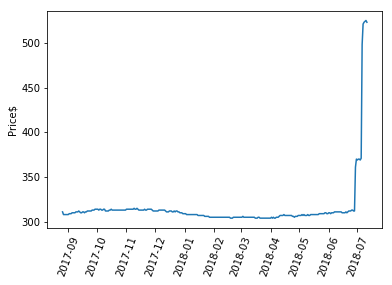

X: 1.38  -  883.62 Y: -223.44  -  426.3
Y: [311.0, 308.0, 308.0] ... [524.0, 525.0, 523.0]


In [48]:
albany_to_philadelphia="1.3828125 202.86 L 4.1484375 211.68 L 6.9140625 211.68 L 9.6796875 211.68 L 12.4453125 211.68 L 15.2109375 211.68 L 17.9765625 211.68 L 20.7421875 208.74 L 23.5078125 208.74 L 26.2734375 208.74 L 29.0390625 205.8 L 31.8046875 205.8 L 34.5703125 205.8 L 37.3359375 205.8 L 40.1015625 202.86 L 42.8671875 202.86 L 45.6328125 202.86 L 48.3984375 199.92000000000002 L 51.1640625 202.86 L 53.9296875 205.8 L 56.6953125 205.8 L 59.4609375 202.86 L 62.2265625 202.86 L 64.9921875 205.8 L 67.7578125 202.86 L 70.5234375 202.86 L 73.2890625 199.92000000000002 L 76.0546875 199.92000000000002 L 78.8203125 199.92000000000002 L 81.5859375 199.92000000000002 L 84.3515625 199.92000000000002 L 87.1171875 196.98000000000002 L 89.8828125 196.98000000000002 L 92.6484375 196.98000000000002 L 95.4140625 194.04000000000002 L 98.1796875 194.04000000000002 L 100.9453125 194.04000000000002 L 103.7109375 194.04000000000002 L 106.4765625 196.98000000000002 L 109.2421875 194.04000000000002 L 112.0078125 194.04000000000002 L 114.7734375 196.98000000000002 L 117.5390625 196.98000000000002 L 120.3046875 194.04000000000002 L 123.0703125 194.04000000000002 L 125.8359375 199.92000000000002 L 128.6015625 199.92000000000002 L 131.3671875 199.92000000000002 L 134.1328125 199.92000000000002 L 136.8984375 196.98000000000002 L 139.6640625 196.98000000000002 L 142.4296875 194.04000000000002 L 145.1953125 196.98000000000002 L 147.9609375 196.98000000000002 L 150.7265625 196.98000000000002 L 153.4921875 196.98000000000002 L 156.2578125 196.98000000000002 L 159.0234375 196.98000000000002 L 161.7890625 196.98000000000002 L 164.5546875 196.98000000000002 L 167.3203125 196.98000000000002 L 170.0859375 196.98000000000002 L 172.8515625 196.98000000000002 L 175.6171875 196.98000000000002 L 178.3828125 196.98000000000002 L 181.1484375 196.98000000000002 L 183.9140625 196.98000000000002 L 186.6796875 194.04000000000002 L 189.4453125 194.04000000000002 L 192.2109375 194.04000000000002 L 194.9765625 194.04000000000002 L 197.7421875 194.04000000000002 L 200.5078125 194.04000000000002 L 203.2734375 194.04000000000002 L 206.0390625 194.04000000000002 L 208.8046875 191.10000000000002 L 211.5703125 194.04000000000002 L 214.3359375 194.04000000000002 L 217.1015625 191.10000000000002 L 219.8671875 194.04000000000002 L 222.6328125 196.98000000000002 L 225.3984375 196.98000000000002 L 228.1640625 196.98000000000002 L 230.9296875 196.98000000000002 L 233.6953125 196.98000000000002 L 236.4609375 196.98000000000002 L 239.2265625 194.04000000000002 L 241.9921875 196.98000000000002 L 244.7578125 196.98000000000002 L 247.5234375 194.04000000000002 L 250.2890625 194.04000000000002 L 253.0546875 194.04000000000002 L 255.8203125 194.04000000000002 L 258.5859375 194.04000000000002 L 261.3515625 196.98000000000002 L 264.1171875 199.92000000000002 L 266.8828125 199.92000000000002 L 269.6484375 199.92000000000002 L 272.4140625 199.92000000000002 L 275.1796875 199.92000000000002 L 277.9453125 199.92000000000002 L 280.7109375 196.98000000000002 L 283.4765625 196.98000000000002 L 286.2421875 196.98000000000002 L 289.0078125 196.98000000000002 L 291.7734375 196.98000000000002 L 294.5390625 196.98000000000002 L 297.3046875 196.98000000000002 L 300.0703125 199.92000000000002 L 302.8359375 202.86 L 305.6015625 202.86 L 308.3671875 202.86 L 311.1328125 199.92000000000002 L 313.8984375 199.92000000000002 L 316.6640625 199.92000000000002 L 319.4296875 202.86 L 322.1953125 202.86 L 324.9609375 199.92000000000002 L 327.7265625 202.86 L 330.4921875 199.92000000000002 L 333.2578125 199.92000000000002 L 336.0234375 202.86 L 338.7890625 202.86 L 341.5546875 205.8 L 344.3203125 205.8 L 347.0859375 205.8 L 349.8515625 208.74 L 352.6171875 208.74 L 355.3828125 208.74 L 358.1484375 208.74 L 360.9140625 211.68 L 363.6796875 211.68 L 366.4453125 211.68 L 369.2109375 211.68 L 371.9765625 211.68 L 374.7421875 211.68 L 377.5078125 211.68 L 380.2734375 211.68 L 383.0390625 211.68 L 385.8046875 211.68 L 388.5703125 211.68 L 391.3359375 211.68 L 394.1015625 214.62 L 396.8671875 214.62 L 399.6328125 214.62 L 402.3984375 214.62 L 405.1640625 214.62 L 407.9296875 214.62 L 410.6953125 214.62 L 413.4609375 217.56 L 416.2265625 217.56 L 418.9921875 217.56 L 421.7578125 217.56 L 424.5234375 217.56 L 427.2890625 220.5 L 430.0546875 220.5 L 432.8203125 220.5 L 435.5859375 220.5 L 438.3515625 220.5 L 441.1171875 220.5 L 443.8828125 220.5 L 446.6484375 220.5 L 449.4140625 220.5 L 452.1796875 220.5 L 454.9453125 220.5 L 457.7109375 220.5 L 460.4765625 220.5 L 463.2421875 220.5 L 466.0078125 220.5 L 468.7734375 220.5 L 471.5390625 220.5 L 474.3046875 220.5 L 477.0703125 220.5 L 479.8359375 220.5 L 482.6015625 220.5 L 485.3671875 220.5 L 488.1328125 223.44 L 490.8984375 223.44 L 493.6640625 223.44 L 496.4296875 220.5 L 499.1953125 220.5 L 501.9609375 220.5 L 504.7265625 220.5 L 507.4921875 220.5 L 510.2578125 220.5 L 513.0234375 220.5 L 515.7890625 220.5 L 518.5546875 220.5 L 521.3203125 220.5 L 524.0859375 217.56 L 526.8515625 220.5 L 529.6171875 220.5 L 532.3828125 220.5 L 535.1484375 220.5 L 537.9140625 220.5 L 540.6796875 220.5 L 543.4453125 220.5 L 546.2109375 220.5 L 548.9765625 220.5 L 551.7421875 220.5 L 554.5078125 220.5 L 557.2734375 220.5 L 560.0390625 223.44 L 562.8046875 223.44 L 565.5703125 223.44 L 568.3359375 220.5 L 571.1015625 220.5 L 573.8671875 223.44 L 576.6328125 223.44 L 579.3984375 223.44 L 582.1640625 223.44 L 584.9296875 223.44 L 587.6953125 223.44 L 590.4609375 223.44 L 593.2265625 223.44 L 595.9921875 223.44 L 598.7578125 223.44 L 601.5234375 223.44 L 604.2890625 223.44 L 607.0546875 220.5 L 609.8203125 223.44 L 612.5859375 220.5 L 615.3515625 223.44 L 618.1171875 223.44 L 620.8828125 220.5 L 623.6484375 220.5 L 626.4140625 220.5 L 629.1796875 217.56 L 631.9453125 214.62 L 634.7109375 214.62 L 637.4765625 214.62 L 640.2421875 214.62 L 643.0078125 211.68 L 645.7734375 214.62 L 648.5390625 214.62 L 651.3046875 214.62 L 654.0703125 214.62 L 656.8359375 214.62 L 659.6015625 214.62 L 662.3671875 214.62 L 665.1328125 214.62 L 667.8984375 217.56 L 670.6640625 217.56 L 673.4296875 220.5 L 676.1953125 217.56 L 678.9609375 217.56 L 681.7265625 217.56 L 684.4921875 214.62 L 687.2578125 214.62 L 690.0234375 214.62 L 692.7890625 214.62 L 695.5546875 211.68 L 698.3203125 214.62 L 701.0859375 211.68 L 703.8515625 214.62 L 706.6171875 214.62 L 709.3828125 214.62 L 712.1484375 211.68 L 714.9140625 214.62 L 717.6796875 214.62 L 720.4453125 211.68 L 723.2109375 211.68 L 725.9765625 211.68 L 728.7421875 211.68 L 731.5078125 211.68 L 734.2734375 211.68 L 737.0390625 211.68 L 739.8046875 211.68 L 742.5703125 211.68 L 745.3359375 208.74 L 748.1015625 208.74 L 750.8671875 208.74 L 753.6328125 208.74 L 756.3984375 208.74 L 759.1640625 208.74 L 761.9296875 205.8 L 764.6953125 205.8 L 767.4609375 208.74 L 770.2265625 208.74 L 772.9921875 205.8 L 775.7578125 205.8 L 778.5234375 208.74 L 781.2890625 205.8 L 784.0546875 205.8 L 786.8203125 205.8 L 789.5859375 202.86 L 792.3515625 202.86 L 795.1171875 202.86 L 797.8828125 202.86 L 800.6484375 202.86 L 803.4140625 202.86 L 806.1796875 202.86 L 808.9453125 202.86 L 811.7109375 205.8 L 814.4765625 205.8 L 817.2421875 205.8 L 820.0078125 205.8 L 822.7734375 202.86 L 825.5390625 205.8 L 828.3046875 202.86 L 831.0703125 199.92000000000002 L 833.8359375 199.92000000000002 L 836.6015625 199.92000000000002 L 839.3671875 196.98000000000002 L 842.1328125 196.98000000000002 L 844.8984375 199.92000000000002 L 847.6640625 199.92000000000002 L 850.4296875 55.860000000000014 L 853.1953125 29.399999999999977 L 855.9609375 32.34000000000003 L 858.7265625 29.399999999999977 L 861.4921875 29.399999999999977 L 864.2578125 32.34000000000003 L 867.0234375 26.45999999999998 L 869.7890625 -346.91999999999996 L 872.5546875 -414.53999999999996 L 875.3203125 -420.41999999999996 L 878.0859375 -423.36 L 880.8515625 -426.29999999999995 L 883.6171875 -420.41999999999996"
datasets.append(Flight(flight='Albany to Philadelphia',data=parseAndPlot(albany_to_philadelphia,304,525)))

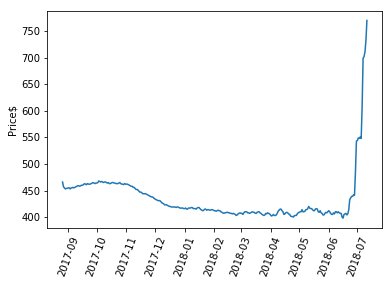

X: 1.38  -  883.62 Y: -248.92  -  480.2
Y: [466.0, 457.0, 455.0] ... [711.0, 733.0, 770.0]


In [49]:
rochester_to_syracuse="1.3828125 115.64000000000001 L 4.1484375 133.28 L 6.9140625 137.2 L 9.6796875 141.12 L 12.4453125 139.16 L 15.2109375 139.16 L 17.9765625 137.2 L 20.7421875 137.2 L 23.5078125 141.12 L 26.2734375 137.2 L 29.0390625 137.2 L 31.8046875 135.24 L 34.5703125 137.2 L 37.3359375 135.24 L 40.1015625 133.28 L 42.8671875 131.32 L 45.6328125 129.36 L 48.3984375 129.36 L 51.1640625 131.32 L 53.9296875 129.36 L 56.6953125 127.4 L 59.4609375 127.4 L 62.2265625 125.44 L 64.9921875 121.52000000000001 L 67.7578125 123.47999999999999 L 70.5234375 125.44 L 73.2890625 121.52000000000001 L 76.0546875 123.47999999999999 L 78.8203125 123.47999999999999 L 81.5859375 123.47999999999999 L 84.3515625 121.52000000000001 L 87.1171875 119.56 L 89.8828125 117.6 L 92.6484375 119.56 L 95.4140625 121.52000000000001 L 98.1796875 119.56 L 100.9453125 119.56 L 103.7109375 117.6 L 106.4765625 111.72 L 109.2421875 113.68 L 112.0078125 115.64000000000001 L 114.7734375 113.68 L 117.5390625 115.64000000000001 L 120.3046875 117.6 L 123.0703125 115.64000000000001 L 125.8359375 115.64000000000001 L 128.6015625 117.6 L 131.3671875 119.56 L 134.1328125 117.6 L 136.8984375 121.52000000000001 L 139.6640625 121.52000000000001 L 142.4296875 119.56 L 145.1953125 117.6 L 147.9609375 117.6 L 150.7265625 119.56 L 153.4921875 119.56 L 156.2578125 121.52000000000001 L 159.0234375 121.52000000000001 L 161.7890625 121.52000000000001 L 164.5546875 119.56 L 167.3203125 117.6 L 170.0859375 121.52000000000001 L 172.8515625 123.47999999999999 L 175.6171875 123.47999999999999 L 178.3828125 125.44 L 181.1484375 121.52000000000001 L 183.9140625 123.47999999999999 L 186.6796875 123.47999999999999 L 189.4453125 123.47999999999999 L 192.2109375 125.44 L 194.9765625 127.4 L 197.7421875 129.36 L 200.5078125 131.32 L 203.2734375 131.32 L 206.0390625 135.24 L 208.8046875 135.24 L 211.5703125 139.16 L 214.3359375 143.08 L 217.1015625 143.08 L 219.8671875 145.04 L 222.6328125 148.96 L 225.3984375 152.88 L 228.1640625 152.88 L 230.9296875 154.84 L 233.6953125 158.76 L 236.4609375 158.76 L 239.2265625 158.76 L 241.9921875 158.76 L 244.7578125 160.72 L 247.5234375 162.68 L 250.2890625 164.64000000000001 L 253.0546875 166.60000000000002 L 255.8203125 168.56 L 258.5859375 170.51999999999998 L 261.3515625 170.51999999999998 L 264.1171875 172.48000000000002 L 266.8828125 176.4 L 269.6484375 178.36 L 272.4140625 180.32 L 275.1796875 182.28 L 277.9453125 184.24 L 280.7109375 184.24 L 283.4765625 184.24 L 286.2421875 188.16 L 289.0078125 192.07999999999998 L 291.7734375 194.04000000000002 L 294.5390625 196 L 297.3046875 199.92000000000002 L 300.0703125 199.92000000000002 L 302.8359375 199.92000000000002 L 305.6015625 201.88 L 308.3671875 203.84 L 311.1328125 205.8 L 313.8984375 205.8 L 316.6640625 207.76 L 319.4296875 207.76 L 322.1953125 207.76 L 324.9609375 207.76 L 327.7265625 207.76 L 330.4921875 209.72 L 333.2578125 207.76 L 336.0234375 207.76 L 338.7890625 209.72 L 341.5546875 211.68 L 344.3203125 211.68 L 347.0859375 211.68 L 349.8515625 211.68 L 352.6171875 213.64 L 355.3828125 213.64 L 358.1484375 211.68 L 360.9140625 215.6 L 363.6796875 215.6 L 366.4453125 211.68 L 369.2109375 211.68 L 371.9765625 211.68 L 374.7421875 209.72 L 377.5078125 209.72 L 380.2734375 213.64 L 383.0390625 213.64 L 385.8046875 213.64 L 388.5703125 215.6 L 391.3359375 211.68 L 394.1015625 209.72 L 396.8671875 209.72 L 399.6328125 213.64 L 402.3984375 217.56 L 405.1640625 219.51999999999998 L 407.9296875 221.48000000000002 L 410.6953125 219.51999999999998 L 413.4609375 215.6 L 416.2265625 215.6 L 418.9921875 219.51999999999998 L 421.7578125 217.56 L 424.5234375 217.56 L 427.2890625 219.51999999999998 L 430.0546875 219.51999999999998 L 432.8203125 217.56 L 435.5859375 217.56 L 438.3515625 219.51999999999998 L 441.1171875 221.48000000000002 L 443.8828125 221.48000000000002 L 446.6484375 223.44 L 449.4140625 221.48000000000002 L 452.1796875 219.51999999999998 L 454.9453125 221.48000000000002 L 457.7109375 221.48000000000002 L 460.4765625 225.4 L 463.2421875 227.36 L 466.0078125 229.32 L 468.7734375 231.28 L 471.5390625 229.32 L 474.3046875 229.32 L 477.0703125 227.36 L 479.8359375 227.36 L 482.6015625 229.32 L 485.3671875 229.32 L 488.1328125 231.28 L 490.8984375 231.28 L 493.6640625 233.24 L 496.4296875 231.28 L 499.1953125 233.24 L 501.9609375 235.2 L 504.7265625 239.12 L 507.4921875 237.16 L 510.2578125 233.24 L 513.0234375 231.28 L 515.7890625 229.32 L 518.5546875 231.28 L 521.3203125 231.28 L 524.0859375 235.2 L 526.8515625 229.32 L 529.6171875 225.4 L 532.3828125 225.4 L 535.1484375 225.4 L 537.9140625 229.32 L 540.6796875 229.32 L 543.4453125 231.28 L 546.2109375 229.32 L 548.9765625 227.36 L 551.7421875 225.4 L 554.5078125 227.36 L 557.2734375 227.36 L 560.0390625 231.28 L 562.8046875 231.28 L 565.5703125 227.36 L 568.3359375 225.4 L 571.1015625 225.4 L 573.8671875 229.32 L 576.6328125 231.28 L 579.3984375 235.2 L 582.1640625 237.16 L 584.9296875 239.12 L 587.6953125 237.16 L 590.4609375 231.28 L 593.2265625 233.24 L 595.9921875 229.32 L 598.7578125 231.28 L 601.5234375 233.24 L 604.2890625 237.16 L 607.0546875 241.07999999999998 L 609.8203125 239.12 L 612.5859375 235.2 L 615.3515625 239.12 L 618.1171875 239.12 L 620.8828125 237.16 L 623.6484375 231.28 L 626.4140625 223.44 L 629.1796875 219.51999999999998 L 631.9453125 215.6 L 634.7109375 215.6 L 637.4765625 221.48000000000002 L 640.2421875 225.4 L 643.0078125 235.2 L 645.7734375 233.24 L 648.5390625 229.32 L 651.3046875 227.36 L 654.0703125 229.32 L 656.8359375 233.24 L 659.6015625 235.2 L 662.3671875 241.07999999999998 L 665.1328125 243.04 L 667.8984375 243.04 L 670.6640625 245 L 673.4296875 239.12 L 676.1953125 239.12 L 678.9609375 239.12 L 681.7265625 233.24 L 684.4921875 229.32 L 687.2578125 227.36 L 690.0234375 225.4 L 692.7890625 225.4 L 695.5546875 217.56 L 698.3203125 225.4 L 701.0859375 225.4 L 703.8515625 223.44 L 706.6171875 217.56 L 709.3828125 217.56 L 712.1484375 213.64 L 714.9140625 205.8 L 717.6796875 211.68 L 720.4453125 213.64 L 723.2109375 213.64 L 725.9765625 217.56 L 728.7421875 221.48000000000002 L 731.5078125 221.48000000000002 L 734.2734375 215.6 L 737.0390625 213.64 L 739.8046875 215.6 L 742.5703125 225.4 L 745.3359375 227.36 L 748.1015625 221.48000000000002 L 750.8671875 229.32 L 753.6328125 231.28 L 756.3984375 237.16 L 759.1640625 237.16 L 761.9296875 231.28 L 764.6953125 227.36 L 767.4609375 229.32 L 770.2265625 225.4 L 772.9921875 221.48000000000002 L 775.7578125 225.4 L 778.5234375 231.28 L 781.2890625 235.2 L 784.0546875 235.2 L 786.8203125 229.32 L 789.5859375 233.24 L 792.3515625 225.4 L 795.1171875 225.4 L 797.8828125 229.32 L 800.6484375 225.4 L 803.4140625 229.32 L 806.1796875 231.28 L 808.9453125 231.28 L 811.7109375 245 L 814.4765625 248.92000000000002 L 817.2421875 235.2 L 820.0078125 233.24 L 822.7734375 231.28 L 825.5390625 237.16 L 828.3046875 233.24 L 831.0703125 217.56 L 833.8359375 180.32 L 836.6015625 174.44 L 839.3671875 168.56 L 842.1328125 168.56 L 844.8984375 162.68 L 847.6640625 164.64000000000001 L 850.4296875 78.4 L 853.1953125 -35.27999999999997 L 855.9609375 -37.24000000000001 L 858.7265625 -47.04000000000002 L 861.4921875 -45.079999999999984 L 864.2578125 -50.95999999999998 L 867.0234375 -45.079999999999984 L 869.7890625 -162.68 L 872.5546875 -341.03999999999996 L 875.3203125 -346.91999999999996 L 878.0859375 -364.55999999999995 L 880.8515625 -407.67999999999995 L 883.6171875 -480.19999999999993"
datasets.append(Flight(flight='Rochester to Syracuse',data=parseAndPlot(rochester_to_syracuse,398,770)))

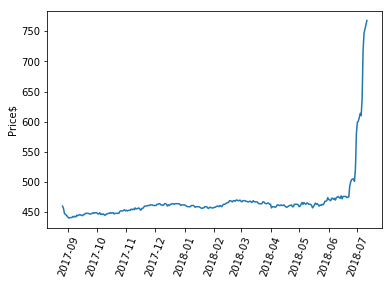

X: 1.38  -  883.62 Y: -258.72  -  512.74
Y: [460.0, 456.0, 448.0] ... [754.0, 761.0, 768.0]


In [50]:
flint_to_syracuse="1.3828125 211.68 L 4.1484375 221.08800000000002 L 6.9140625 239.904 L 9.6796875 244.608 L 12.4453125 246.96 L 15.2109375 251.664 L 17.9765625 256.368 L 20.7421875 258.72 L 23.5078125 256.368 L 26.2734375 256.368 L 29.0390625 256.368 L 31.8046875 251.664 L 34.5703125 254.01600000000002 L 37.3359375 251.664 L 40.1015625 254.01600000000002 L 42.8671875 246.96 L 45.6328125 249.312 L 48.3984375 246.96 L 51.1640625 244.608 L 53.9296875 246.96 L 56.6953125 246.96 L 59.4609375 249.312 L 62.2265625 244.608 L 64.9921875 244.608 L 67.7578125 239.904 L 70.5234375 239.904 L 73.2890625 239.904 L 76.0546875 239.904 L 78.8203125 242.256 L 81.5859375 242.256 L 84.3515625 242.256 L 87.1171875 239.904 L 89.8828125 237.55200000000002 L 92.6484375 239.904 L 95.4140625 237.55200000000002 L 98.1796875 237.55200000000002 L 100.9453125 237.55200000000002 L 103.7109375 242.256 L 106.4765625 242.256 L 109.2421875 237.55200000000002 L 112.0078125 244.608 L 114.7734375 242.256 L 117.5390625 244.608 L 120.3046875 242.256 L 123.0703125 246.96 L 125.8359375 246.96 L 128.6015625 242.256 L 131.3671875 242.256 L 134.1328125 239.904 L 136.8984375 239.904 L 139.6640625 237.55200000000002 L 142.4296875 239.904 L 145.1953125 237.55200000000002 L 147.9609375 237.55200000000002 L 150.7265625 242.256 L 153.4921875 239.904 L 156.2578125 239.904 L 159.0234375 239.904 L 161.7890625 239.904 L 164.5546875 239.904 L 167.3203125 232.848 L 170.0859375 230.496 L 172.8515625 230.496 L 175.6171875 230.496 L 178.3828125 228.144 L 181.1484375 225.792 L 183.9140625 230.496 L 186.6796875 228.144 L 189.4453125 230.496 L 192.2109375 228.144 L 194.9765625 228.144 L 197.7421875 228.144 L 200.5078125 223.44 L 203.2734375 225.792 L 206.0390625 223.44 L 208.8046875 225.792 L 211.5703125 218.736 L 214.3359375 223.44 L 217.1015625 221.08800000000002 L 219.8671875 221.08800000000002 L 222.6328125 218.736 L 225.3984375 223.44 L 228.1640625 228.144 L 230.9296875 221.08800000000002 L 233.6953125 221.08800000000002 L 236.4609375 216.38400000000001 L 239.2265625 211.68 L 241.9921875 211.68 L 244.7578125 211.68 L 247.5234375 209.328 L 250.2890625 209.328 L 253.0546875 209.328 L 255.8203125 206.976 L 258.5859375 206.976 L 261.3515625 206.976 L 264.1171875 209.328 L 266.8828125 209.328 L 269.6484375 209.328 L 272.4140625 209.328 L 275.1796875 204.62400000000002 L 277.9453125 204.62400000000002 L 280.7109375 202.272 L 283.4765625 202.272 L 286.2421875 206.976 L 289.0078125 206.976 L 291.7734375 209.328 L 294.5390625 206.976 L 297.3046875 202.272 L 300.0703125 202.272 L 302.8359375 204.62400000000002 L 305.6015625 211.68 L 308.3671875 206.976 L 311.1328125 209.328 L 313.8984375 204.62400000000002 L 316.6640625 204.62400000000002 L 319.4296875 202.272 L 322.1953125 202.272 L 324.9609375 204.62400000000002 L 327.7265625 202.272 L 330.4921875 202.272 L 333.2578125 202.272 L 336.0234375 202.272 L 338.7890625 202.272 L 341.5546875 204.62400000000002 L 344.3203125 209.328 L 347.0859375 206.976 L 349.8515625 206.976 L 352.6171875 206.976 L 355.3828125 206.976 L 358.1484375 209.328 L 360.9140625 211.68 L 363.6796875 214.032 L 366.4453125 214.032 L 369.2109375 214.032 L 371.9765625 214.032 L 374.7421875 209.328 L 377.5078125 209.328 L 380.2734375 209.328 L 383.0390625 211.68 L 385.8046875 216.38400000000001 L 388.5703125 214.032 L 391.3359375 214.032 L 394.1015625 214.032 L 396.8671875 214.032 L 399.6328125 216.38400000000001 L 402.3984375 218.736 L 405.1640625 221.08800000000002 L 407.9296875 218.736 L 410.6953125 218.736 L 413.4609375 214.032 L 416.2265625 214.032 L 418.9921875 214.032 L 421.7578125 218.736 L 424.5234375 221.08800000000002 L 427.2890625 216.38400000000001 L 430.0546875 216.38400000000001 L 432.8203125 218.736 L 435.5859375 218.736 L 438.3515625 218.736 L 441.1171875 216.38400000000001 L 443.8828125 216.38400000000001 L 446.6484375 214.032 L 449.4140625 211.68 L 452.1796875 211.68 L 454.9453125 214.032 L 457.7109375 209.328 L 460.4765625 211.68 L 463.2421875 214.032 L 466.0078125 206.976 L 468.7734375 204.62400000000002 L 471.5390625 204.62400000000002 L 474.3046875 202.272 L 477.0703125 199.92000000000002 L 479.8359375 197.568 L 482.6015625 197.568 L 485.3671875 190.512 L 488.1328125 190.512 L 490.8984375 192.864 L 493.6640625 195.216 L 496.4296875 190.512 L 499.1953125 190.512 L 501.9609375 192.864 L 504.7265625 188.16000000000003 L 507.4921875 188.16000000000003 L 510.2578125 190.512 L 513.0234375 190.512 L 515.7890625 188.16000000000003 L 518.5546875 192.864 L 521.3203125 195.216 L 524.0859375 190.512 L 526.8515625 190.512 L 529.6171875 190.512 L 532.3828125 192.864 L 535.1484375 192.864 L 537.9140625 195.216 L 540.6796875 195.216 L 543.4453125 192.864 L 546.2109375 192.864 L 548.9765625 197.568 L 551.7421875 195.216 L 554.5078125 190.512 L 557.2734375 195.216 L 560.0390625 195.216 L 562.8046875 195.216 L 565.5703125 195.216 L 568.3359375 199.92000000000002 L 571.1015625 202.272 L 573.8671875 202.272 L 576.6328125 202.272 L 579.3984375 202.272 L 582.1640625 195.216 L 584.9296875 195.216 L 587.6953125 199.92000000000002 L 590.4609375 202.272 L 593.2265625 202.272 L 595.9921875 199.92000000000002 L 598.7578125 199.92000000000002 L 601.5234375 204.62400000000002 L 604.2890625 204.62400000000002 L 607.0546875 218.736 L 609.8203125 214.032 L 612.5859375 214.032 L 615.3515625 214.032 L 618.1171875 216.38400000000001 L 620.8828125 214.032 L 623.6484375 206.976 L 626.4140625 206.976 L 629.1796875 209.328 L 631.9453125 209.328 L 634.7109375 206.976 L 637.4765625 209.328 L 640.2421875 209.328 L 643.0078125 206.976 L 645.7734375 211.68 L 648.5390625 214.032 L 651.3046875 216.38400000000001 L 654.0703125 214.032 L 656.8359375 211.68 L 659.6015625 209.328 L 662.3671875 209.328 L 665.1328125 206.976 L 667.8984375 214.032 L 670.6640625 214.032 L 673.4296875 204.62400000000002 L 676.1953125 204.62400000000002 L 678.9609375 204.62400000000002 L 681.7265625 204.62400000000002 L 684.4921875 206.976 L 687.2578125 214.032 L 690.0234375 211.68 L 692.7890625 204.62400000000002 L 695.5546875 197.568 L 698.3203125 204.62400000000002 L 701.0859375 197.568 L 703.8515625 202.272 L 706.6171875 204.62400000000002 L 709.3828125 199.92000000000002 L 712.1484375 199.92000000000002 L 714.9140625 204.62400000000002 L 717.6796875 204.62400000000002 L 720.4453125 204.62400000000002 L 723.2109375 209.328 L 725.9765625 218.736 L 728.7421875 214.032 L 731.5078125 206.976 L 734.2734375 199.92000000000002 L 737.0390625 204.62400000000002 L 739.8046875 202.272 L 742.5703125 206.976 L 745.3359375 211.68 L 748.1015625 206.976 L 750.8671875 209.328 L 753.6328125 204.62400000000002 L 756.3984375 206.976 L 759.1640625 202.272 L 761.9296875 192.864 L 764.6953125 192.864 L 767.4609375 190.512 L 770.2265625 178.752 L 772.9921875 185.808 L 775.7578125 188.16000000000003 L 778.5234375 190.512 L 781.2890625 181.104 L 784.0546875 181.104 L 786.8203125 185.808 L 789.5859375 181.104 L 792.3515625 188.16000000000003 L 795.1171875 178.752 L 797.8828125 176.4 L 800.6484375 174.048 L 803.4140625 178.752 L 806.1796875 181.104 L 808.9453125 171.69600000000003 L 811.7109375 183.45600000000002 L 814.4765625 174.048 L 817.2421875 174.048 L 820.0078125 174.048 L 822.7734375 174.048 L 825.5390625 178.752 L 828.3046875 176.4 L 831.0703125 176.4 L 833.8359375 134.06400000000002 L 836.6015625 117.60000000000002 L 839.3671875 108.19200000000001 L 842.1328125 105.84 L 844.8984375 105.84 L 847.6640625 115.24800000000002 L 850.4296875 63.50400000000002 L 853.1953125 -72.91199999999998 L 855.9609375 -115.24799999999999 L 858.7265625 -119.952 L 861.4921875 -134.06399999999996 L 864.2578125 -150.52799999999996 L 867.0234375 -141.11999999999995 L 869.7890625 -209.32799999999997 L 872.5546875 -397.48799999999994 L 875.3203125 -463.34399999999994 L 878.0859375 -479.808 L 880.8515625 -496.27199999999993 L 883.6171875 -512.736"
datasets.append(Flight(flight='Flint to Syracuse',data=parseAndPlot(flint_to_syracuse,440,768)))


In [51]:
to_providance="1.3828125 129.36 L 4.1484375 134.06400000000002 L 6.9140625 138.768 L 9.6796875 138.768 L 12.4453125 141.12 L 15.2109375 141.12 L 17.9765625 143.472 L 20.7421875 143.472 L 23.5078125 143.472 L 26.2734375 143.472 L 29.0390625 143.472 L 31.8046875 141.12 L 34.5703125 141.12 L 37.3359375 141.12 L 40.1015625 141.12 L 42.8671875 141.12 L 45.6328125 141.12 L 48.3984375 141.12 L 51.1640625 141.12 L 53.9296875 141.12 L 56.6953125 141.12 L 59.4609375 141.12 L 62.2265625 141.12 L 64.9921875 141.12 L 67.7578125 141.12 L 70.5234375 141.12 L 73.2890625 141.12 L 76.0546875 141.12 L 78.8203125 141.12 L 81.5859375 141.12 L 84.3515625 141.12 L 87.1171875 141.12 L 89.8828125 138.768 L 92.6484375 138.768 L 95.4140625 138.768 L 98.1796875 138.768 L 100.9453125 138.768 L 103.7109375 141.12 L 106.4765625 141.12 L 109.2421875 141.12 L 112.0078125 138.768 L 114.7734375 141.12 L 117.5390625 141.12 L 120.3046875 141.12 L 123.0703125 141.12 L 125.8359375 138.768 L 128.6015625 138.768 L 131.3671875 138.768 L 134.1328125 138.768 L 136.8984375 138.768 L 139.6640625 138.768 L 142.4296875 136.416 L 145.1953125 136.416 L 147.9609375 134.06400000000002 L 150.7265625 134.06400000000002 L 153.4921875 134.06400000000002 L 156.2578125 131.71200000000002 L 159.0234375 131.71200000000002 L 161.7890625 131.71200000000002 L 164.5546875 131.71200000000002 L 167.3203125 129.36 L 170.0859375 129.36 L 172.8515625 129.36 L 175.6171875 129.36 L 178.3828125 129.36 L 181.1484375 129.36 L 183.9140625 127.00800000000001 L 186.6796875 127.00800000000001 L 189.4453125 124.656 L 192.2109375 124.656 L 194.9765625 127.00800000000001 L 197.7421875 127.00800000000001 L 200.5078125 127.00800000000001 L 203.2734375 127.00800000000001 L 206.0390625 127.00800000000001 L 208.8046875 127.00800000000001 L 211.5703125 127.00800000000001 L 214.3359375 129.36 L 217.1015625 129.36 L 219.8671875 129.36 L 222.6328125 129.36 L 225.3984375 129.36 L 228.1640625 129.36 L 230.9296875 129.36 L 233.6953125 129.36 L 236.4609375 129.36 L 239.2265625 129.36 L 241.9921875 129.36 L 244.7578125 129.36 L 247.5234375 131.71200000000002 L 250.2890625 131.71200000000002 L 253.0546875 134.06400000000002 L 255.8203125 134.06400000000002 L 258.5859375 134.06400000000002 L 261.3515625 134.06400000000002 L 264.1171875 134.06400000000002 L 266.8828125 134.06400000000002 L 269.6484375 136.416 L 272.4140625 136.416 L 275.1796875 138.768 L 277.9453125 138.768 L 280.7109375 138.768 L 283.4765625 138.768 L 286.2421875 141.12 L 289.0078125 141.12 L 291.7734375 143.472 L 294.5390625 145.824 L 297.3046875 148.17600000000002 L 300.0703125 148.17600000000002 L 302.8359375 148.17600000000002 L 305.6015625 148.17600000000002 L 308.3671875 150.52800000000002 L 311.1328125 150.52800000000002 L 313.8984375 152.88 L 316.6640625 152.88 L 319.4296875 155.232 L 322.1953125 155.232 L 324.9609375 155.232 L 327.7265625 157.584 L 330.4921875 159.936 L 333.2578125 159.936 L 336.0234375 162.288 L 338.7890625 162.288 L 341.5546875 164.64000000000001 L 344.3203125 164.64000000000001 L 347.0859375 166.99200000000002 L 349.8515625 169.344 L 352.6171875 169.344 L 355.3828125 169.344 L 358.1484375 171.69600000000003 L 360.9140625 171.69600000000003 L 363.6796875 171.69600000000003 L 366.4453125 176.4 L 369.2109375 176.4 L 371.9765625 176.4 L 374.7421875 176.4 L 377.5078125 176.4 L 380.2734375 178.752 L 383.0390625 181.104 L 385.8046875 183.45600000000002 L 388.5703125 183.45600000000002 L 391.3359375 185.808 L 394.1015625 185.808 L 396.8671875 185.808 L 399.6328125 188.16000000000003 L 402.3984375 188.16000000000003 L 405.1640625 190.512 L 407.9296875 192.864 L 410.6953125 192.864 L 413.4609375 192.864 L 416.2265625 192.864 L 418.9921875 192.864 L 421.7578125 195.216 L 424.5234375 195.216 L 427.2890625 195.216 L 430.0546875 195.216 L 432.8203125 192.864 L 435.5859375 190.512 L 438.3515625 192.864 L 441.1171875 192.864 L 443.8828125 192.864 L 446.6484375 192.864 L 449.4140625 190.512 L 452.1796875 190.512 L 454.9453125 190.512 L 457.7109375 190.512 L 460.4765625 190.512 L 463.2421875 192.864 L 466.0078125 190.512 L 468.7734375 188.16000000000003 L 471.5390625 188.16000000000003 L 474.3046875 188.16000000000003 L 477.0703125 188.16000000000003 L 479.8359375 188.16000000000003 L 482.6015625 190.512 L 485.3671875 190.512 L 488.1328125 188.16000000000003 L 490.8984375 188.16000000000003 L 493.6640625 188.16000000000003 L 496.4296875 188.16000000000003 L 499.1953125 190.512 L 501.9609375 192.864 L 504.7265625 192.864 L 507.4921875 190.512 L 510.2578125 190.512 L 513.0234375 190.512 L 515.7890625 192.864 L 518.5546875 192.864 L 521.3203125 195.216 L 524.0859375 195.216 L 526.8515625 195.216 L 529.6171875 195.216 L 532.3828125 195.216 L 535.1484375 195.216 L 537.9140625 197.568 L 540.6796875 202.272 L 543.4453125 199.92000000000002 L 546.2109375 199.92000000000002 L 548.9765625 199.92000000000002 L 551.7421875 199.92000000000002 L 554.5078125 202.272 L 557.2734375 206.976 L 560.0390625 209.328 L 562.8046875 209.328 L 565.5703125 209.328 L 568.3359375 209.328 L 571.1015625 209.328 L 573.8671875 211.68 L 576.6328125 214.032 L 579.3984375 216.38400000000001 L 582.1640625 218.736 L 584.9296875 218.736 L 587.6953125 218.736 L 590.4609375 218.736 L 593.2265625 221.08800000000002 L 595.9921875 223.44 L 598.7578125 225.792 L 601.5234375 225.792 L 604.2890625 225.792 L 607.0546875 225.792 L 609.8203125 228.144 L 612.5859375 228.144 L 615.3515625 230.496 L 618.1171875 232.848 L 620.8828125 232.848 L 623.6484375 230.496 L 626.4140625 230.496 L 629.1796875 230.496 L 631.9453125 232.848 L 634.7109375 235.2 L 637.4765625 239.904 L 640.2421875 242.256 L 643.0078125 246.96 L 645.7734375 246.96 L 648.5390625 251.664 L 651.3046875 254.01600000000002 L 654.0703125 256.368 L 656.8359375 256.368 L 659.6015625 261.072 L 662.3671875 263.424 L 665.1328125 263.424 L 667.8984375 265.776 L 670.6640625 265.776 L 673.4296875 265.776 L 676.1953125 268.128 L 678.9609375 270.48 L 681.7265625 270.48 L 684.4921875 270.48 L 687.2578125 268.128 L 690.0234375 268.128 L 692.7890625 265.776 L 695.5546875 268.128 L 698.3203125 268.128 L 701.0859375 265.776 L 703.8515625 265.776 L 706.6171875 263.424 L 709.3828125 263.424 L 712.1484375 261.072 L 714.9140625 263.424 L 717.6796875 265.776 L 720.4453125 263.424 L 723.2109375 263.424 L 725.9765625 261.072 L 728.7421875 261.072 L 731.5078125 261.072 L 734.2734375 263.424 L 737.0390625 270.48 L 739.8046875 265.776 L 742.5703125 263.424 L 745.3359375 263.424 L 748.1015625 261.072 L 750.8671875 261.072 L 753.6328125 261.072 L 756.3984375 263.424 L 759.1640625 258.72 L 761.9296875 254.01600000000002 L 764.6953125 251.664 L 767.4609375 249.312 L 770.2265625 249.312 L 772.9921875 251.664 L 775.7578125 251.664 L 778.5234375 254.01600000000002 L 781.2890625 251.664 L 784.0546875 249.312 L 786.8203125 246.96 L 789.5859375 246.96 L 792.3515625 249.312 L 795.1171875 249.312 L 797.8828125 249.312 L 800.6484375 244.608 L 803.4140625 244.608 L 806.1796875 246.96 L 808.9453125 246.96 L 811.7109375 254.01600000000002 L 814.4765625 249.312 L 817.2421875 242.256 L 820.0078125 239.904 L 822.7734375 237.55200000000002 L 825.5390625 235.2 L 828.3046875 237.55200000000002 L 831.0703125 223.44 L 833.8359375 206.976 L 836.6015625 206.976 L 839.3671875 204.62400000000002 L 842.1328125 199.92000000000002 L 844.8984375 199.92000000000002 L 847.6640625 202.272 L 850.4296875 94.08000000000001 L 853.1953125 35.28000000000003 L 855.9609375 37.632000000000005 L 858.7265625 37.632000000000005 L 861.4921875 32.928 L 864.2578125 30.576000000000022 L 867.0234375 32.928 L 869.7890625 -164.64 L 872.5546875 -268.12799999999993 L 875.3203125 -268.12799999999993 L 878.0859375 -263.424 L 880.8515625 -301.0559999999999 L 883.6171875 -319.87199999999996"
datasets.append(Flight(flight='USA to Providance',data=parseAndPlot(to_providance,385,636)))

X: 1.38  -  883.62 Y: -270.48  -  319.87
Y: [445.0, 443.0, 441.0] ... [612.0, 628.0, 636.0]


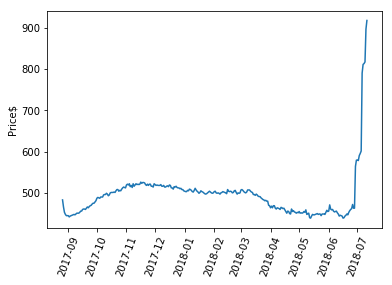

X: 1.38  -  883.62 Y: -235.2  -  465.99
Y: [484.0, 467.0, 454.0] ... [817.0, 896.0, 917.0]


In [52]:
boston_to_providance="1.3828125 170.51999999999998 L 4.1484375 195.51 L 6.9140625 214.62 L 9.6796875 221.97 L 12.4453125 226.38 L 15.2109375 226.38 L 17.9765625 226.38 L 20.7421875 230.79 L 23.5078125 227.85 L 26.2734375 226.38 L 29.0390625 224.91 L 31.8046875 223.44 L 34.5703125 221.97 L 37.3359375 223.44 L 40.1015625 220.5 L 42.8671875 217.56 L 45.6328125 217.56 L 48.3984375 217.56 L 51.1640625 214.62 L 53.9296875 210.21 L 56.6953125 210.21 L 59.4609375 204.32999999999998 L 62.2265625 202.86 L 64.9921875 202.86 L 67.7578125 204.32999999999998 L 70.5234375 199.92000000000002 L 73.2890625 195.51 L 76.0546875 198.45 L 78.8203125 194.04000000000002 L 81.5859375 191.10000000000002 L 84.3515625 189.63 L 87.1171875 185.22 L 89.8828125 182.28 L 92.6484375 182.28 L 95.4140625 177.87 L 98.1796875 173.46 L 100.9453125 164.64000000000001 L 103.7109375 161.7 L 106.4765625 163.17000000000002 L 109.2421875 164.64000000000001 L 112.0078125 160.23 L 114.7734375 160.23 L 117.5390625 160.23 L 120.3046875 152.88 L 123.0703125 151.41 L 125.8359375 151.41 L 128.6015625 147 L 131.3671875 149.94 L 134.1328125 155.82 L 136.8984375 152.88 L 139.6640625 145.53 L 142.4296875 144.06 L 145.1953125 144.06 L 147.9609375 144.06 L 150.7265625 142.59 L 153.4921875 144.06 L 156.2578125 138.18 L 159.0234375 133.77 L 161.7890625 133.77 L 164.5546875 139.65 L 167.3203125 136.71 L 170.0859375 138.18 L 172.8515625 132.3 L 175.6171875 127.89000000000001 L 178.3828125 124.95000000000002 L 181.1484375 126.42000000000002 L 183.9140625 127.89000000000001 L 186.6796875 117.6 L 189.4453125 114.66 L 192.2109375 117.6 L 194.9765625 113.19 L 197.7421875 123.47999999999999 L 200.5078125 119.07 L 203.2734375 126.42000000000002 L 206.0390625 113.19 L 208.8046875 122.00999999999999 L 211.5703125 117.6 L 214.3359375 113.19 L 217.1015625 116.13 L 219.8671875 114.66 L 222.6328125 116.13 L 225.3984375 114.66 L 228.1640625 107.31 L 230.9296875 111.72 L 233.6953125 108.78 L 236.4609375 108.78 L 239.2265625 110.25 L 241.9921875 116.13 L 244.7578125 119.07 L 247.5234375 114.66 L 250.2890625 119.07 L 253.0546875 114.66 L 255.8203125 114.66 L 258.5859375 122.00999999999999 L 261.3515625 122.00999999999999 L 264.1171875 124.95000000000002 L 266.8828125 113.19 L 269.6484375 116.13 L 272.4140625 119.07 L 275.1796875 117.6 L 277.9453125 119.07 L 280.7109375 119.07 L 283.4765625 119.07 L 286.2421875 116.13 L 289.0078125 122.00999999999999 L 291.7734375 122.00999999999999 L 294.5390625 119.07 L 297.3046875 124.95000000000002 L 300.0703125 124.95000000000002 L 302.8359375 122.00999999999999 L 305.6015625 120.53999999999999 L 308.3671875 123.47999999999999 L 311.1328125 117.6 L 313.8984375 119.07 L 316.6640625 127.89000000000001 L 319.4296875 127.89000000000001 L 322.1953125 132.3 L 324.9609375 123.47999999999999 L 327.7265625 124.95000000000002 L 330.4921875 122.00999999999999 L 333.2578125 126.42000000000002 L 336.0234375 127.89000000000001 L 338.7890625 127.89000000000001 L 341.5546875 130.83 L 344.3203125 129.36 L 347.0859375 133.77 L 349.8515625 133.77 L 352.6171875 138.18 L 355.3828125 139.65 L 358.1484375 141.12 L 360.9140625 141.12 L 363.6796875 136.71 L 366.4453125 138.18 L 369.2109375 132.3 L 371.9765625 133.77 L 374.7421875 136.71 L 377.5078125 141.12 L 380.2734375 142.59 L 383.0390625 136.71 L 385.8046875 129.36 L 388.5703125 135.24 L 391.3359375 139.65 L 394.1015625 142.59 L 396.8671875 147 L 399.6328125 144.06 L 402.3984375 138.18 L 405.1640625 141.12 L 407.9296875 142.59 L 410.6953125 145.53 L 413.4609375 148.47 L 416.2265625 149.94 L 418.9921875 148.47 L 421.7578125 145.53 L 424.5234375 142.59 L 427.2890625 139.65 L 430.0546875 142.59 L 432.8203125 145.53 L 435.5859375 147 L 438.3515625 145.53 L 441.1171875 141.12 L 443.8828125 139.65 L 446.6484375 145.53 L 449.4140625 147 L 452.1796875 145.53 L 454.9453125 147 L 457.7109375 149.94 L 460.4765625 145.53 L 463.2421875 144.06 L 466.0078125 141.12 L 468.7734375 142.59 L 471.5390625 144.06 L 474.3046875 145.53 L 477.0703125 148.47 L 479.8359375 133.77 L 482.6015625 139.65 L 485.3671875 141.12 L 488.1328125 139.65 L 490.8984375 141.12 L 493.6640625 145.53 L 496.4296875 144.06 L 499.1953125 138.18 L 501.9609375 136.71 L 504.7265625 144.06 L 507.4921875 149.94 L 510.2578125 145.53 L 513.0234375 147 L 515.7890625 145.53 L 518.5546875 135.24 L 521.3203125 133.77 L 524.0859375 136.71 L 526.8515625 141.12 L 529.6171875 144.06 L 532.3828125 145.53 L 535.1484375 142.59 L 537.9140625 135.24 L 540.6796875 135.24 L 543.4453125 135.24 L 546.2109375 139.65 L 548.9765625 142.59 L 551.7421875 144.06 L 554.5078125 151.41 L 557.2734375 151.41 L 560.0390625 154.35 L 562.8046875 149.94 L 565.5703125 152.88 L 568.3359375 157.29 L 571.1015625 158.76 L 573.8671875 158.76 L 576.6328125 163.17000000000002 L 579.3984375 166.11 L 582.1640625 169.05 L 584.9296875 170.51999999999998 L 587.6953125 173.46 L 590.4609375 171.99 L 593.2265625 174.93 L 595.9921875 174.93 L 598.7578125 189.63 L 601.5234375 191.10000000000002 L 604.2890625 198.45 L 607.0546875 192.57 L 609.8203125 198.45 L 612.5859375 191.10000000000002 L 615.3515625 191.10000000000002 L 618.1171875 199.92000000000002 L 620.8828125 202.86 L 623.6484375 198.45 L 626.4140625 199.92000000000002 L 629.1796875 201.39 L 631.9453125 204.32999999999998 L 634.7109375 196.98000000000002 L 637.4765625 198.45 L 640.2421875 201.39 L 643.0078125 199.92000000000002 L 645.7734375 205.8 L 648.5390625 211.68 L 651.3046875 217.56 L 654.0703125 210.21 L 656.8359375 211.68 L 659.6015625 219.03 L 662.3671875 220.5 L 665.1328125 202.86 L 667.8984375 211.68 L 670.6640625 208.74 L 673.4296875 213.15 L 676.1953125 214.62 L 678.9609375 217.56 L 681.7265625 214.62 L 684.4921875 216.09 L 687.2578125 211.68 L 690.0234375 217.56 L 692.7890625 216.09 L 695.5546875 217.56 L 698.3203125 216.09 L 701.0859375 211.68 L 703.8515625 214.62 L 706.6171875 205.8 L 709.3828125 221.97 L 712.1484375 219.03 L 714.9140625 217.56 L 717.6796875 233.73000000000002 L 720.4453125 235.2 L 723.2109375 227.85 L 725.9765625 221.97 L 728.7421875 223.44 L 731.5078125 223.44 L 734.2734375 221.97 L 737.0390625 220.5 L 739.8046875 219.03 L 742.5703125 221.97 L 745.3359375 220.5 L 748.1015625 220.5 L 750.8671875 226.38 L 753.6328125 220.5 L 756.3984375 220.5 L 759.1640625 220.5 L 761.9296875 221.97 L 764.6953125 214.62 L 767.4609375 207.26999999999998 L 770.2265625 211.68 L 772.9921875 210.21 L 775.7578125 188.16 L 778.5234375 202.86 L 781.2890625 205.8 L 784.0546875 204.32999999999998 L 786.8203125 210.21 L 789.5859375 213.15 L 792.3515625 211.68 L 795.1171875 210.21 L 797.8828125 216.09 L 800.6484375 220.5 L 803.4140625 227.85 L 806.1796875 224.91 L 808.9453125 226.38 L 811.7109375 227.85 L 814.4765625 235.2 L 817.2421875 233.73000000000002 L 820.0078125 227.85 L 822.7734375 224.91 L 825.5390625 220.5 L 828.3046875 223.44 L 831.0703125 214.62 L 833.8359375 208.74 L 836.6015625 204.32999999999998 L 839.3671875 201.39 L 842.1328125 186.69 L 844.8984375 199.92000000000002 L 847.6640625 199.92000000000002 L 850.4296875 51.45000000000002 L 853.1953125 29.399999999999977 L 855.9609375 29.399999999999977 L 858.7265625 30.870000000000005 L 861.4921875 13.230000000000018 L 864.2578125 5.8799999999999955 L 867.0234375 -2.9399999999999977 L 869.7890625 -279.29999999999995 L 872.5546875 -310.16999999999996 L 875.3203125 -313.11 L 878.0859375 -318.99 L 880.8515625 -435.12 L 883.6171875 -465.99"
datasets.append(Flight(flight='Boston to Providance',data=parseAndPlot(boston_to_providance,440,917)))

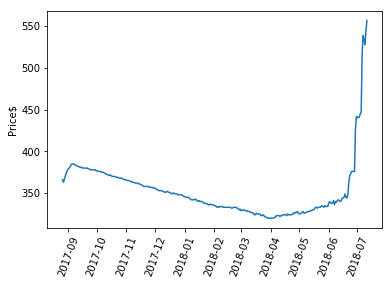

X: 1.38  -  883.62 Y: -246.96  -  310.46
Y: [366.0, 363.0, 367.0] ... [528.0, 544.0, 557.0]


In [53]:
boston_to_allentown="1.3828125 138.768 L 4.1484375 145.824 L 6.9140625 136.416 L 9.6796875 127.00800000000001 L 12.4453125 119.952 L 15.2109375 112.89600000000002 L 17.9765625 108.19200000000001 L 20.7421875 105.84 L 23.5078125 101.13600000000002 L 26.2734375 96.43200000000002 L 29.0390625 94.08000000000001 L 31.8046875 94.08000000000001 L 34.5703125 94.08000000000001 L 37.3359375 96.43200000000002 L 40.1015625 98.78400000000002 L 42.8671875 98.78400000000002 L 45.6328125 101.13600000000002 L 48.3984375 101.13600000000002 L 51.1640625 103.488 L 53.9296875 103.488 L 56.6953125 103.488 L 59.4609375 105.84 L 62.2265625 105.84 L 64.9921875 105.84 L 67.7578125 105.84 L 70.5234375 105.84 L 73.2890625 105.84 L 76.0546875 108.19200000000001 L 78.8203125 108.19200000000001 L 81.5859375 110.54400000000001 L 84.3515625 110.54400000000001 L 87.1171875 110.54400000000001 L 89.8828125 110.54400000000001 L 92.6484375 110.54400000000001 L 95.4140625 110.54400000000001 L 98.1796875 112.89600000000002 L 100.9453125 112.89600000000002 L 103.7109375 115.24800000000002 L 106.4765625 115.24800000000002 L 109.2421875 115.24800000000002 L 112.0078125 115.24800000000002 L 114.7734375 117.60000000000002 L 117.5390625 117.60000000000002 L 120.3046875 117.60000000000002 L 123.0703125 119.952 L 125.8359375 122.304 L 128.6015625 122.304 L 131.3671875 124.656 L 134.1328125 124.656 L 136.8984375 127.00800000000001 L 139.6640625 124.656 L 142.4296875 127.00800000000001 L 145.1953125 129.36 L 147.9609375 129.36 L 150.7265625 129.36 L 153.4921875 129.36 L 156.2578125 131.71200000000002 L 159.0234375 131.71200000000002 L 161.7890625 131.71200000000002 L 164.5546875 134.06400000000002 L 167.3203125 134.06400000000002 L 170.0859375 134.06400000000002 L 172.8515625 134.06400000000002 L 175.6171875 136.416 L 178.3828125 136.416 L 181.1484375 138.768 L 183.9140625 138.768 L 186.6796875 138.768 L 189.4453125 141.12 L 192.2109375 141.12 L 194.9765625 141.12 L 197.7421875 143.472 L 200.5078125 143.472 L 203.2734375 145.824 L 206.0390625 145.824 L 208.8046875 145.824 L 211.5703125 148.17600000000002 L 214.3359375 148.17600000000002 L 217.1015625 148.17600000000002 L 219.8671875 148.17600000000002 L 222.6328125 150.52800000000002 L 225.3984375 150.52800000000002 L 228.1640625 152.88 L 230.9296875 152.88 L 233.6953125 155.232 L 236.4609375 157.584 L 239.2265625 157.584 L 241.9921875 157.584 L 244.7578125 157.584 L 247.5234375 157.584 L 250.2890625 157.584 L 253.0546875 159.936 L 255.8203125 159.936 L 258.5859375 159.936 L 261.3515625 159.936 L 264.1171875 162.288 L 266.8828125 162.288 L 269.6484375 162.288 L 272.4140625 164.64000000000001 L 275.1796875 166.99200000000002 L 277.9453125 166.99200000000002 L 280.7109375 169.344 L 283.4765625 169.344 L 286.2421875 169.344 L 289.0078125 169.344 L 291.7734375 171.69600000000003 L 294.5390625 171.69600000000003 L 297.3046875 174.048 L 300.0703125 174.048 L 302.8359375 171.69600000000003 L 305.6015625 171.69600000000003 L 308.3671875 174.048 L 311.1328125 174.048 L 313.8984375 176.4 L 316.6640625 176.4 L 319.4296875 178.752 L 322.1953125 176.4 L 324.9609375 176.4 L 327.7265625 178.752 L 330.4921875 178.752 L 333.2578125 178.752 L 336.0234375 181.104 L 338.7890625 181.104 L 341.5546875 181.104 L 344.3203125 181.104 L 347.0859375 181.104 L 349.8515625 183.45600000000002 L 352.6171875 185.808 L 355.3828125 185.808 L 358.1484375 188.16000000000003 L 360.9140625 188.16000000000003 L 363.6796875 188.16000000000003 L 366.4453125 188.16000000000003 L 369.2109375 190.512 L 371.9765625 192.864 L 374.7421875 195.216 L 377.5078125 195.216 L 380.2734375 195.216 L 383.0390625 195.216 L 385.8046875 192.864 L 388.5703125 195.216 L 391.3359375 197.568 L 394.1015625 199.92000000000002 L 396.8671875 197.568 L 399.6328125 199.92000000000002 L 402.3984375 199.92000000000002 L 405.1640625 199.92000000000002 L 407.9296875 202.272 L 410.6953125 204.62400000000002 L 413.4609375 204.62400000000002 L 416.2265625 204.62400000000002 L 418.9921875 206.976 L 421.7578125 206.976 L 424.5234375 209.328 L 427.2890625 209.328 L 430.0546875 206.976 L 432.8203125 209.328 L 435.5859375 209.328 L 438.3515625 209.328 L 441.1171875 211.68 L 443.8828125 211.68 L 446.6484375 214.032 L 449.4140625 216.38400000000001 L 452.1796875 214.032 L 454.9453125 216.38400000000001 L 457.7109375 214.032 L 460.4765625 214.032 L 463.2421875 214.032 L 466.0078125 216.38400000000001 L 468.7734375 216.38400000000001 L 471.5390625 216.38400000000001 L 474.3046875 216.38400000000001 L 477.0703125 216.38400000000001 L 479.8359375 216.38400000000001 L 482.6015625 216.38400000000001 L 485.3671875 216.38400000000001 L 488.1328125 216.38400000000001 L 490.8984375 218.736 L 493.6640625 218.736 L 496.4296875 216.38400000000001 L 499.1953125 216.38400000000001 L 501.9609375 216.38400000000001 L 504.7265625 216.38400000000001 L 507.4921875 218.736 L 510.2578125 221.08800000000002 L 513.0234375 223.44 L 515.7890625 221.08800000000002 L 518.5546875 225.792 L 521.3203125 225.792 L 524.0859375 223.44 L 526.8515625 223.44 L 529.6171875 225.792 L 532.3828125 225.792 L 535.1484375 225.792 L 537.9140625 228.144 L 540.6796875 228.144 L 543.4453125 228.144 L 546.2109375 230.496 L 548.9765625 230.496 L 551.7421875 232.848 L 554.5078125 232.848 L 557.2734375 237.55200000000002 L 560.0390625 237.55200000000002 L 562.8046875 232.848 L 565.5703125 235.2 L 568.3359375 235.2 L 571.1015625 235.2 L 573.8671875 235.2 L 576.6328125 239.904 L 579.3984375 239.904 L 582.1640625 237.55200000000002 L 584.9296875 239.904 L 587.6953125 242.256 L 590.4609375 244.608 L 593.2265625 244.608 L 595.9921875 246.96 L 598.7578125 246.96 L 601.5234375 246.96 L 604.2890625 246.96 L 607.0546875 246.96 L 609.8203125 246.96 L 612.5859375 246.96 L 615.3515625 244.608 L 618.1171875 244.608 L 620.8828125 239.904 L 623.6484375 239.904 L 626.4140625 239.904 L 629.1796875 239.904 L 631.9453125 242.256 L 634.7109375 239.904 L 637.4765625 239.904 L 640.2421875 237.55200000000002 L 643.0078125 237.55200000000002 L 645.7734375 237.55200000000002 L 648.5390625 237.55200000000002 L 651.3046875 239.904 L 654.0703125 235.2 L 656.8359375 237.55200000000002 L 659.6015625 237.55200000000002 L 662.3671875 237.55200000000002 L 665.1328125 237.55200000000002 L 667.8984375 235.2 L 670.6640625 235.2 L 673.4296875 230.496 L 676.1953125 232.848 L 678.9609375 230.496 L 681.7265625 228.144 L 684.4921875 232.848 L 687.2578125 235.2 L 690.0234375 235.2 L 692.7890625 232.848 L 695.5546875 230.496 L 698.3203125 228.144 L 701.0859375 232.848 L 703.8515625 232.848 L 706.6171875 230.496 L 709.3828125 230.496 L 712.1484375 228.144 L 714.9140625 228.144 L 717.6796875 228.144 L 720.4453125 225.792 L 723.2109375 225.792 L 725.9765625 223.44 L 728.7421875 223.44 L 731.5078125 221.08800000000002 L 734.2734375 216.38400000000001 L 737.0390625 216.38400000000001 L 739.8046875 218.736 L 742.5703125 216.38400000000001 L 745.3359375 216.38400000000001 L 748.1015625 216.38400000000001 L 750.8671875 214.032 L 753.6328125 211.68 L 756.3984375 214.032 L 759.1640625 216.38400000000001 L 761.9296875 211.68 L 764.6953125 214.032 L 767.4609375 214.032 L 770.2265625 214.032 L 772.9921875 204.62400000000002 L 775.7578125 199.92000000000002 L 778.5234375 204.62400000000002 L 781.2890625 204.62400000000002 L 784.0546875 204.62400000000002 L 786.8203125 197.568 L 789.5859375 209.328 L 792.3515625 199.92000000000002 L 795.1171875 202.272 L 797.8828125 197.568 L 800.6484375 195.216 L 803.4140625 197.568 L 806.1796875 199.92000000000002 L 808.9453125 197.568 L 811.7109375 190.512 L 814.4765625 190.512 L 817.2421875 188.16000000000003 L 820.0078125 178.752 L 822.7734375 188.16000000000003 L 825.5390625 190.512 L 828.3046875 181.104 L 831.0703125 148.17600000000002 L 833.8359375 127.00800000000001 L 836.6015625 122.304 L 839.3671875 115.24800000000002 L 842.1328125 115.24800000000002 L 844.8984375 115.24800000000002 L 847.6640625 115.24800000000002 L 850.4296875 -4.704000000000008 L 853.1953125 -39.98399999999998 L 855.9609375 -35.27999999999997 L 858.7265625 -37.632000000000005 L 861.4921875 -37.632000000000005 L 864.2578125 -47.039999999999964 L 867.0234375 -51.74399999999997 L 869.7890625 -216.38399999999996 L 872.5546875 -268.12799999999993 L 875.3203125 -256.36799999999994 L 878.0859375 -242.25599999999997 L 880.8515625 -279.8879999999999 L 883.6171875 -310.46399999999994"
datasets.append(Flight(flight='Boston to Allentown',data=parseAndPlot(boston_to_allentown,320,557)))

In [54]:
[i.flight for i in datasets]

['USA to Philadelphia',
 'Albany to Philadelphia',
 'Rochester to Syracuse',
 'Flint to Syracuse',
 'USA to Providance',
 'Boston to Providance',
 'Boston to Allentown']

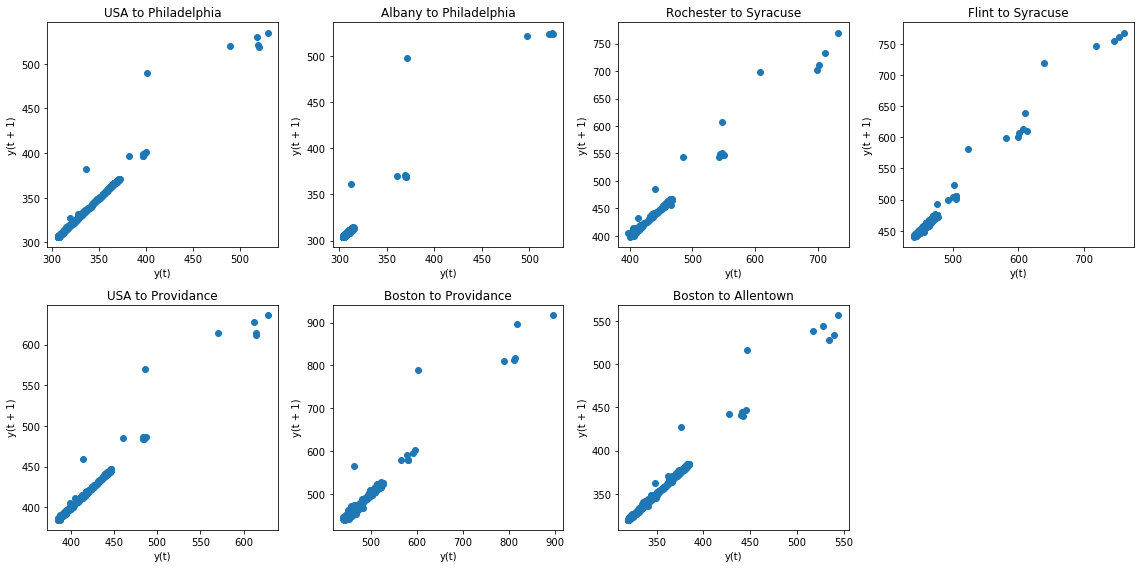

In [55]:
#2) Check correlations

from pandas.plotting import lag_plot
plt.figure(figsize=(16,8));
for i,dataset in enumerate(datasets):    
    ax = plt.subplot(240+i+1)
    ax.set_title(dataset.flight)
    lag_plot(dataset.data)
plt.tight_layout()    
plt.show()

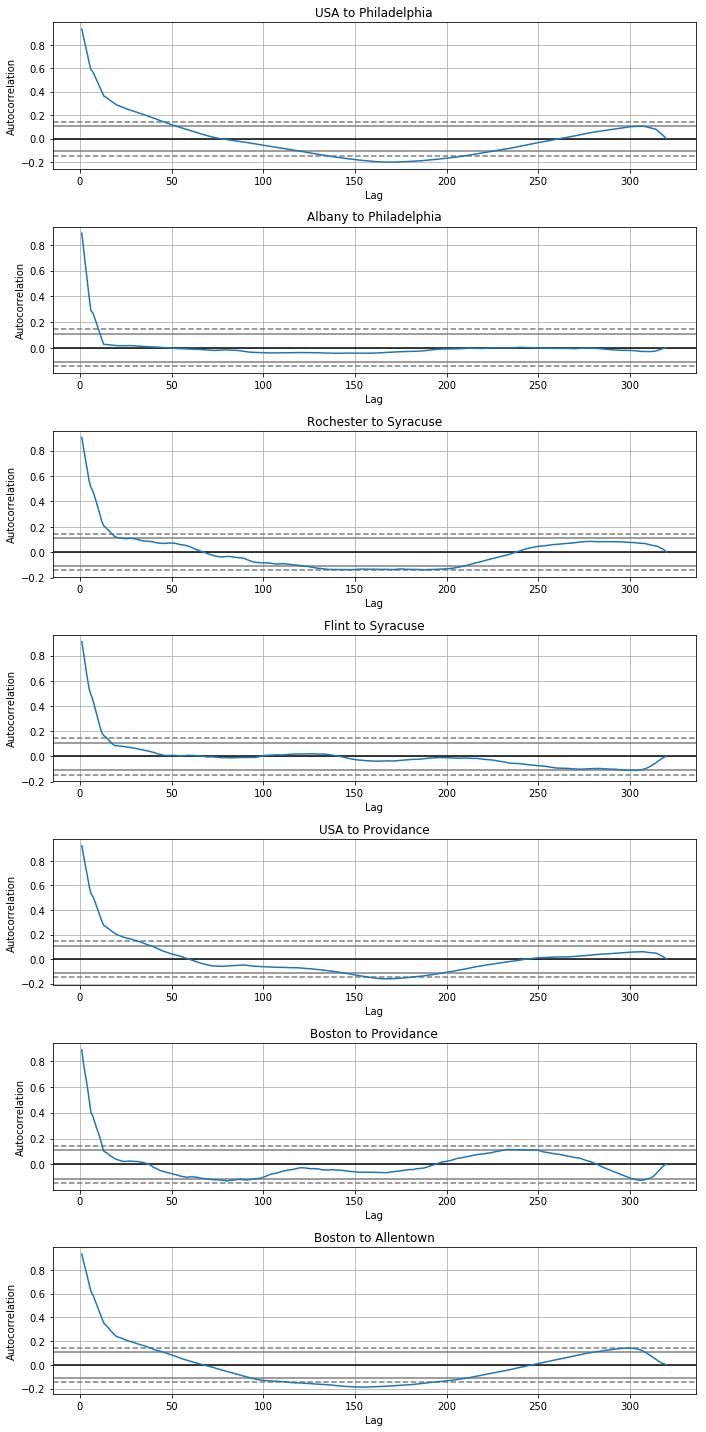

In [57]:
from pandas.plotting import autocorrelation_plot
plt.subplots(7,1,figsize=(10,20))
for i,dataset in enumerate(datasets):    
    ax = plt.subplot(7,1,i+1)
    ax.set_title(dataset.flight)
    autocorrelation_plot(dataset.data,ax=ax)
plt.tight_layout()        
plt.show()


In [468]:
#3) Check stationarity

from statsmodels.tsa.stattools import adfuller

def showStationarity(datas,transform=None):
  #H0 = time serries is non-stacionary - Dickey-Fullera test  
  for i,dataset in enumerate(datas):   
    fd=dataset.data
    try:
        _,p,_,_,_,_ = adfuller(fd, autolag='AIC')
    except Exception as e:
        print(e)
    print("{} D-F test: p-value {} ".format(dataset.flight,p),("Stationary",'Non-stationary')[p>=0.05])


  #Plot rolling statistics: 
  plt.figure(figsize=(12,6));
  for i,dataset in enumerate(datas):   
    fd=dataset.data
    rolmean = fd.rolling(window=7,center=False).mean()
    rolstd = fd.rolling(window=7,center=False).std()
        
    orig = plt.plot(fd, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.tight_layout()
    #plt.show(block=False)  
    
showStationarity(datasets)    

USA to Philadelphia D-F test: p-value 0.7104725908911032  Non-stationary
Albany to Philadelphia D-F test: p-value 0.9873077456572609  Non-stationary
Rochester to Syracuse D-F test: p-value 0.8644508469184788  Non-stationary
Flint to Syracuse D-F test: p-value 0.998725216576902  Non-stationary
USA to Providance D-F test: p-value 0.5161714018030102  Non-stationary
Boston to Providance D-F test: p-value 0.7221875304054811  Non-stationary
Boston to Allentown D-F test: p-value 0.9690178508864982  Non-stationary


In [64]:
#4) Transform and check stationarity again

def transform(data):
    dt=data.iloc[:-40]
    dt=np.log(dt)
    dt=dt-dt.shift()
    return dt.dropna()

datasets_transformed = [Flight(flight=ds.flight,data=transform(ds.data)) for ds in datasets]

showStationarity(datasets_transformed)


USA to Philadelphia D-F test: p-value 0.4400091067900304  Non-stationary
Albany to Philadelphia D-F test: p-value 2.698290674103377e-27  Stationary
Rochester to Syracuse D-F test: p-value 3.389183092152272e-27  Stationary
Flint to Syracuse D-F test: p-value 0.0014007598848126456  Stationary
USA to Providance D-F test: p-value 0.0349996530408124  Stationary
Boston to Providance D-F test: p-value 0.2387645181449209  Non-stationary
Boston to Allentown D-F test: p-value 0.04494058847214259  Stationary


In [477]:
#5) Check tests

import statsmodels.api as sm

def showCorrelation(datas,transform=None):
  #Durbin Watson test  
  #http://www.naukowiec.org/wiedza/statystyka/test-durbina-watsona-niezaleznosc-bledow-obserwacji_423.html
  for i,dataset in enumerate(datas):   
    fd=dataset.data
    
    print("{} D-W test: {} ".format(dataset.flight,sm.stats.durbin_watson(fd)))


  #Plot rolling statistics: 
  plt.figure(figsize=(12,6));
  for i,dataset in enumerate(datas):   
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(fd, lags=5, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(fd, lags=5, ax=ax2)
    plt.show()
    
showCorrelation(datasets_transformed)    

In [171]:
datasets_log = [Flight(flight=ds.flight,data=np.log(ds.data[:-40])) for ds in datasets]
#datasets_log

In [203]:
#6) Fit ARIMA models

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.10f' % (order,mse))
                except Exception as e:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

In [191]:
print(datasets_log[0].flight)
evaluate_models(datasets_log[0].data, p_values, d_values, q_values) 


USA to Philadelphia
ARIMA(0, 0, 0) MSE=0.0093640361
ARIMA(0, 0, 1) MSE=0.0024377329
ARIMA(0, 1, 0) MSE=0.0000034356
ARIMA(0, 1, 1) MSE=0.0000034532
ARIMA(0, 1, 2) MSE=0.0000032348
ARIMA(0, 2, 0) MSE=0.0000075985
ARIMA(0, 2, 1) MSE=0.0000032970
ARIMA(1, 0, 0) MSE=0.0000037179
ARIMA(1, 1, 0) MSE=0.0000034442
ARIMA(1, 1, 2) MSE=0.0000030188
ARIMA(1, 2, 0) MSE=0.0000043751
ARIMA(2, 1, 0) MSE=0.0000032990
ARIMA(2, 2, 0) MSE=0.0000035951
ARIMA(4, 1, 0) MSE=0.0000032144
ARIMA(4, 1, 1) MSE=0.0000030496
ARIMA(4, 2, 0) MSE=0.0000035379
ARIMA(6, 2, 0) MSE=0.0000029357
ARIMA(6, 2, 1) MSE=0.0000027997
ARIMA(6, 2, 2) MSE=0.0000026845
ARIMA(8, 1, 0) MSE=0.0000027482
ARIMA(8, 2, 0) MSE=0.0000026814
ARIMA(8, 2, 1) MSE=0.0000028590
ARIMA(10, 1, 0) MSE=0.0000027487
Best ARIMA(8, 2, 0) MSE=0.000


In [195]:
print(datasets_log[1].flight)
evaluate_models(datasets_log[1].data, p_values, d_values, q_values) 

Albany to Philadelphia
ARIMA(0, 0, 0) MSE=0.0001462473
ARIMA(0, 0, 1) MSE=0.0000485533
ARIMA(0, 0, 2) MSE=0.0000217952
ARIMA(0, 1, 0) MSE=0.0000032517
ARIMA(0, 1, 1) MSE=0.0000030004
ARIMA(0, 1, 2) MSE=0.0000030884
ARIMA(0, 2, 0) MSE=0.0000083591
ARIMA(0, 2, 1) MSE=0.0000033128
ARIMA(1, 0, 0) MSE=0.0000031855
ARIMA(1, 0, 1) MSE=0.0000029433
ARIMA(1, 1, 0) MSE=0.0000030486
ARIMA(1, 2, 0) MSE=0.0000053139
ARIMA(1, 2, 1) MSE=0.0000032445
ARIMA(2, 0, 0) MSE=0.0000029906
ARIMA(2, 0, 1) MSE=0.0000029570
ARIMA(2, 1, 0) MSE=0.0000030679
ARIMA(2, 2, 0) MSE=0.0000046151
ARIMA(2, 2, 1) MSE=0.0000030860
ARIMA(2, 2, 2) MSE=0.0000034797
ARIMA(4, 0, 0) MSE=0.0000030442
ARIMA(4, 1, 0) MSE=0.0000031089
ARIMA(4, 2, 0) MSE=0.0000038024
ARIMA(4, 2, 1) MSE=0.0000031468
ARIMA(6, 0, 0) MSE=0.0000030879
ARIMA(6, 0, 1) MSE=0.0000032679
ARIMA(6, 1, 0) MSE=0.0000033298
ARIMA(6, 1, 1) MSE=0.0000034230
ARIMA(6, 2, 1) MSE=0.0000033842
ARIMA(8, 0, 0) MSE=0.0000033783
ARIMA(8, 2, 0) MSE=0.0000038271
ARIMA(8, 2, 2) MS

In [198]:
print(datasets_log[2].flight)
evaluate_models(datasets_log[2].data, p_values, d_values, q_values) 

Rochester to Syracuse
ARIMA(0, 0, 0) MSE=0.0031932068
ARIMA(0, 0, 1) MSE=0.0009113208
ARIMA(0, 0, 2) MSE=0.0003962712
ARIMA(0, 1, 0) MSE=0.0000243321
ARIMA(0, 1, 1) MSE=0.0000236146
ARIMA(0, 1, 2) MSE=0.0000238649
ARIMA(0, 2, 0) MSE=0.0000387384
ARIMA(0, 2, 1) MSE=0.0000251236
ARIMA(0, 2, 2) MSE=0.0000240042
ARIMA(1, 0, 0) MSE=0.0000236208
ARIMA(1, 1, 0) MSE=0.0000236688
ARIMA(1, 1, 1) MSE=0.0000240437
ARIMA(1, 2, 0) MSE=0.0000334416
ARIMA(1, 2, 1) MSE=0.0000239148
ARIMA(2, 1, 0) MSE=0.0000238844
ARIMA(2, 2, 0) MSE=0.0000319715
ARIMA(2, 2, 1) MSE=0.0000245412
ARIMA(4, 2, 0) MSE=0.0000298307
ARIMA(6, 1, 0) MSE=0.0000250912
ARIMA(8, 0, 0) MSE=0.0000260013
Best ARIMA(0, 1, 1) MSE=0.000


In [204]:
print(datasets_log[3].flight)
evaluate_models(datasets_log[3].data, p_values, d_values, q_values) 

Flint to Syracuse
ARIMA(0, 0, 0) MSE=0.0002676611
ARIMA(0, 0, 1) MSE=0.0000921580
ARIMA(0, 1, 0) MSE=0.0000156324
ARIMA(0, 1, 1) MSE=0.0000156687
ARIMA(0, 1, 2) MSE=0.0000160460
ARIMA(0, 2, 0) MSE=0.0000338140
ARIMA(0, 2, 1) MSE=0.0000163039
ARIMA(1, 0, 0) MSE=0.0000154308
ARIMA(1, 0, 1) MSE=0.0000154933
ARIMA(1, 0, 2) MSE=0.0000159071
ARIMA(1, 1, 0) MSE=0.0000156734
ARIMA(1, 2, 0) MSE=0.0000270615
ARIMA(1, 2, 1) MSE=0.0000165147
ARIMA(2, 0, 0) MSE=0.0000154991
ARIMA(2, 1, 0) MSE=0.0000161297
ARIMA(2, 2, 0) MSE=0.0000227415
ARIMA(2, 2, 1) MSE=0.0000169504
ARIMA(2, 2, 2) MSE=0.0000162773
ARIMA(4, 0, 0) MSE=0.0000161857
ARIMA(4, 0, 1) MSE=0.0000165812
ARIMA(4, 1, 0) MSE=0.0000164640
ARIMA(4, 2, 1) MSE=0.0000183691
ARIMA(4, 2, 2) MSE=0.0000174702
ARIMA(6, 0, 0) MSE=0.0000165610
ARIMA(6, 0, 1) MSE=0.0000172457
ARIMA(6, 0, 2) MSE=0.0000156849
ARIMA(8, 0, 0) MSE=0.0000165005
ARIMA(8, 0, 1) MSE=0.0000166315
ARIMA(8, 0, 2) MSE=0.0000151750
Best ARIMA(8, 0, 2) MSE=0.0000152


In [207]:
print(datasets_log[4].flight)
evaluate_models(datasets_log[4].data, p_values, d_values, q_values) 

USA to Providance
ARIMA(0, 0, 0) MSE=0.0056260575
ARIMA(0, 0, 1) MSE=0.0014831622
ARIMA(0, 1, 0) MSE=0.0000055047
ARIMA(0, 1, 1) MSE=0.0000053468
ARIMA(0, 1, 2) MSE=0.0000053254
ARIMA(0, 2, 0) MSE=0.0000084957
ARIMA(0, 2, 1) MSE=0.0000052083
ARIMA(1, 0, 0) MSE=0.0000058590
ARIMA(1, 1, 0) MSE=0.0000053184
ARIMA(1, 2, 0) MSE=0.0000069146
ARIMA(2, 1, 0) MSE=0.0000053196
ARIMA(2, 2, 0) MSE=0.0000066543
ARIMA(2, 2, 2) MSE=0.0000054249
ARIMA(4, 1, 0) MSE=0.0000054380
ARIMA(4, 2, 0) MSE=0.0000062104
ARIMA(8, 2, 0) MSE=0.0000040462
Best ARIMA(8, 2, 0) MSE=0.0000040


In [209]:
print(datasets_log[5].flight)
evaluate_models(datasets_log[5].data, p_values, d_values, q_values) 

Boston to Providance
ARIMA(0, 0, 0) MSE=0.0044113959
ARIMA(0, 0, 1) MSE=0.0013475111
ARIMA(0, 1, 0) MSE=0.0000603821
ARIMA(0, 1, 1) MSE=0.0000612058
ARIMA(0, 1, 2) MSE=0.0000624925
ARIMA(0, 2, 0) MSE=0.0001450525
ARIMA(0, 2, 1) MSE=0.0000638706
ARIMA(1, 0, 0) MSE=0.0000607596
ARIMA(1, 0, 1) MSE=0.0000617703
ARIMA(1, 0, 2) MSE=0.0000632497
ARIMA(1, 1, 0) MSE=0.0000613758
ARIMA(1, 2, 0) MSE=0.0000999563
ARIMA(2, 0, 0) MSE=0.0000619960
ARIMA(2, 1, 0) MSE=0.0000624692
ARIMA(2, 2, 0) MSE=0.0000862546
ARIMA(2, 2, 1) MSE=0.0000640149
ARIMA(4, 0, 0) MSE=0.0000639985
ARIMA(4, 2, 0) MSE=0.0000770575
ARIMA(4, 2, 1) MSE=0.0000593055
ARIMA(6, 0, 0) MSE=0.0000656668
ARIMA(8, 0, 0) MSE=0.0000671469
ARIMA(8, 0, 1) MSE=0.0000664674
ARIMA(8, 0, 2) MSE=0.0000701718
ARIMA(8, 1, 0) MSE=0.0000643807
Best ARIMA(4, 2, 1) MSE=0.0000593


In [211]:
print(datasets_log[6].flight)
evaluate_models(datasets_log[6].data, p_values, d_values, q_values) 

Boston to Allentown
ARIMA(0, 0, 0) MSE=0.0053000522
ARIMA(0, 1, 0) MSE=0.0000100022
ARIMA(0, 1, 1) MSE=0.0000104165
ARIMA(0, 1, 2) MSE=0.0000107069
ARIMA(0, 2, 0) MSE=0.0000201385
ARIMA(0, 2, 1) MSE=0.0000099674
ARIMA(0, 2, 2) MSE=0.0000099187
ARIMA(1, 1, 0) MSE=0.0000105733
ARIMA(1, 2, 0) MSE=0.0000149678
ARIMA(1, 2, 1) MSE=0.0000099408
ARIMA(1, 2, 2) MSE=0.0000099809
ARIMA(2, 1, 0) MSE=0.0000107678
ARIMA(2, 2, 0) MSE=0.0000124003
ARIMA(4, 1, 0) MSE=0.0000103502
ARIMA(4, 2, 0) MSE=0.0000110481
Best ARIMA(0, 2, 2) MSE=0.0000099


In [486]:
#7) Show predictions for USA flights

#teach every point
def plot_predictions(dataset, arima_order):
    X=dataset.data
    #train_size = len(X)-50
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    originals = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        pred_value=output = model_fit.forecast()[0]
    
        original_value=test[t]

        history.append(original_value)
                
        original_value = np.exp(original_value)
        pred_value = np.exp(pred_value)

        predictions.append(float(pred_value))
        originals.append(float(original_value))
        
         # Calculating the error
        error = ((abs(pred_value - original_value)) / original_value) * 100
        print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    mse = mean_squared_error(originals, predictions)
    plt.subplots(1,2,figsize=(16,8))    
    plt.subplot(1,2,1)
    labels={'Orginal','Predicted'}
    plt.plot(test.index, predictions, color= 'orange')
    plt.plot(test.index, originals, color = 'green')
    plt.title('Expected Vs Predicted Views Forecasting\n %s ARIMA%s MSE=%.10f' %(dataset.flight,arima_order,mse))
    plt.xlabel('Day')
    plt.ylabel('Price$')
    plt.xticks(rotation=70)
    plt.legend(labels)
    plt.subplot(1,2,2)
    labels={'Predicted','Training'}
    plt.plot(test.index, predictions, color= 'orange')
    plt.plot(train.index, np.exp(train),color="blue")
    plt.title('Trained vs Predicted')
    plt.xlabel('Day')
    plt.ylabel('Price$')
    plt.legend(labels)
    plt.xticks(rotation=70)
    plt.show()
    

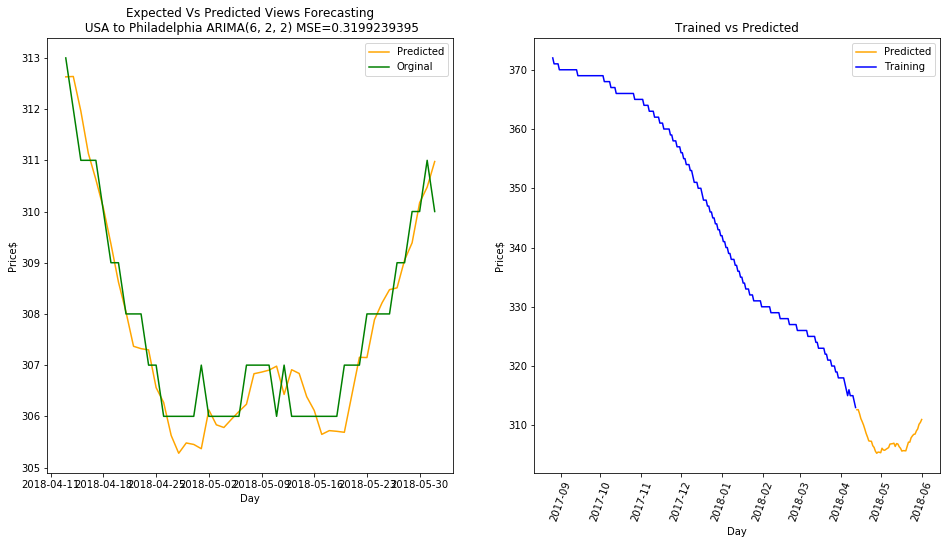

In [197]:

plot_predictions(datasets_log[0], (6,2,2)) # 8.2.0
#50 dni przed odlotem staje sie niestacjonarny


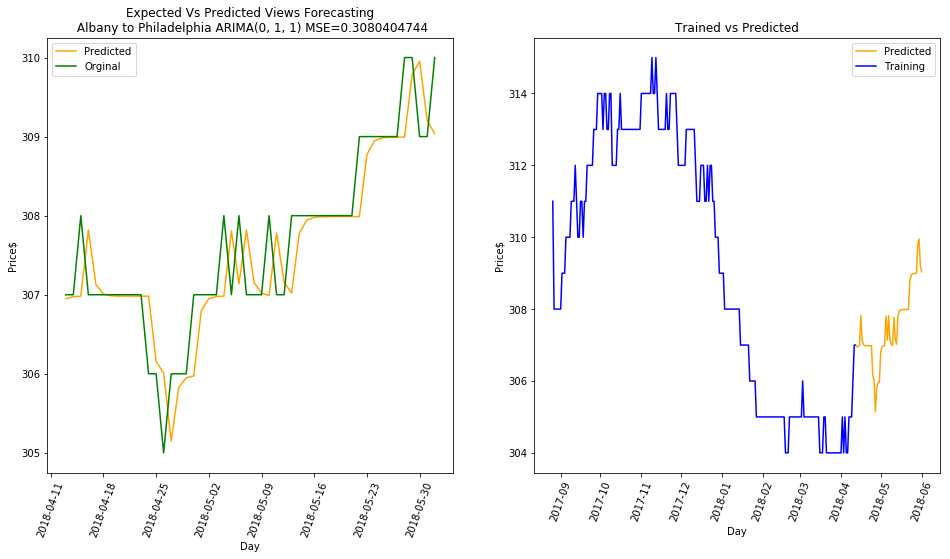

In [200]:
plot_predictions(datasets_log[1], (0,1,1)) #1.0.1

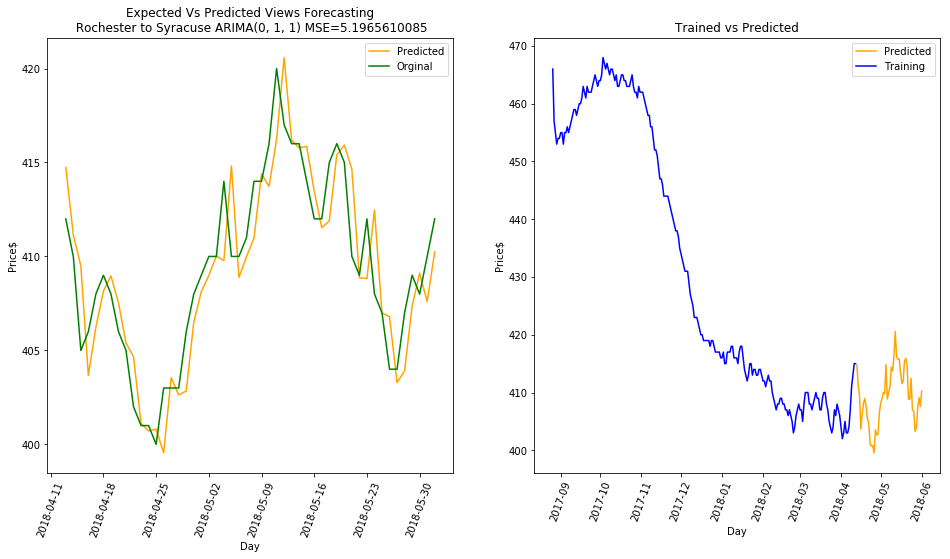

In [201]:
plot_predictions(datasets_log[2], (0,1,1))

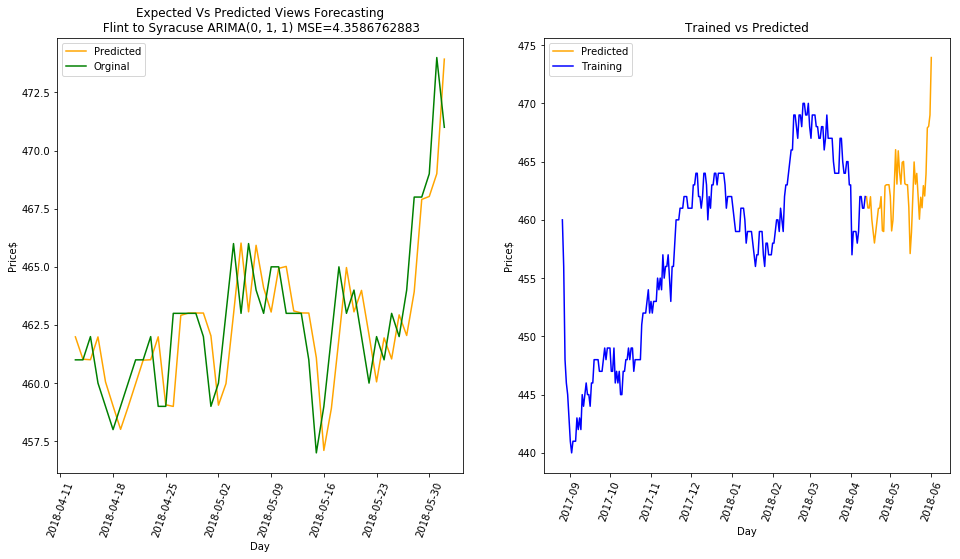

In [206]:
plot_predictions(datasets_log[3], (0,1,1)) #8.0.2

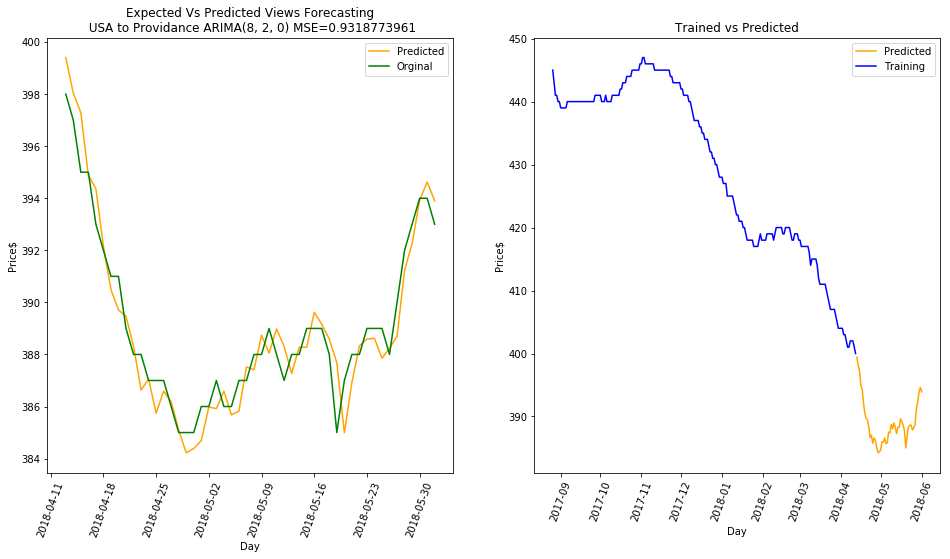

In [208]:
plot_predictions(datasets_log[4], (8,2,0))

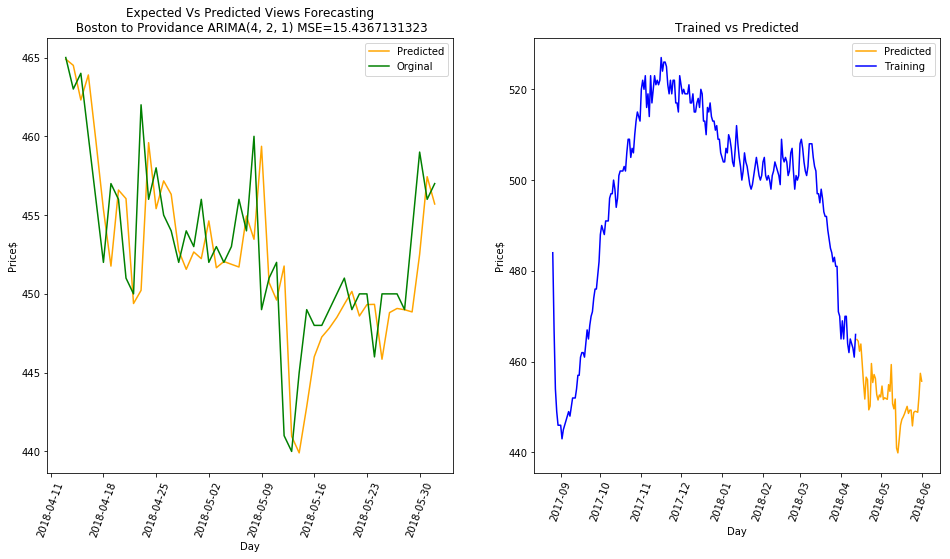

In [210]:
plot_predictions(datasets_log[5], (4,2,1))

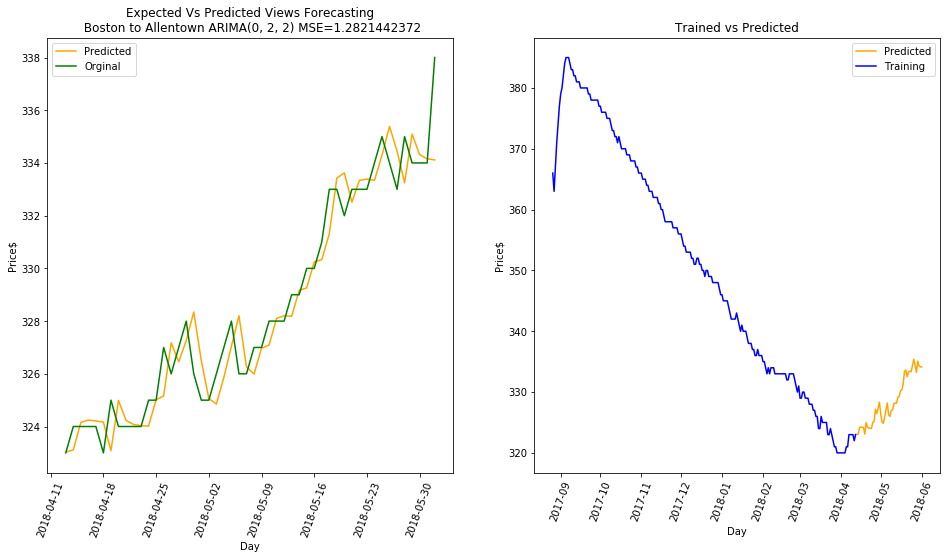

In [212]:
plot_predictions(datasets_log[6], (0,2,2))

In [ ]:
#RESULTS:
#Limitted usage for buy or not to buy because only one future price is predicted quite well (or limitted ones)